# **Исследование рынка компьютерных игр, 2016 год**

**Источники данных:**
Открытые Internet источники.

**Данные:**
- исторические данные о продажах игр, 
- оценки пользователей и экспертов, 
- жанры и платформы (Xbox, PlayStation). 

**Задача:** 
- выполнить предобработку данных;
- провести исследовательский анализ данных;
- выявить определяющие успешность игры закономерности;
- найти потенциально популярный продукт и спланировать рекламные кампании на 2017 год.

**Заказчик:**
Интернет-магазине «Стримчик» - продавец компьютерные игры по всему миру. 


**Структура датафрейма(названия столбцов):**

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). 


## Откроем файл с данными, изучим общую информацию

Импортирую библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import warnings
warnings.simplefilter('ignore')

pd.set_option('display.max_columns', None)

Данные предоставлены в файле csv. Разделитель столбцов - ',', разделитель дроби - '.'. Открываю файл с данными в pandas, сохраняю его в переменную df_0.

<div class="alert alert-info">
<b>Создаю исходный датафрейм df_0</b>
<br>
</div>

In [2]:
df_0 = pd.read_csv('games.csv')

Выведу на экран первые 10 строк загруженного файла.

In [3]:
df_0.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Выведу на экран стандартную информацию о df_0 с помощью info()

In [4]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df_0.describe(include='all')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
count,16713,16715,16446.000000,16713,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,10014,9949
unique,11559,31,NaN,12,NaN,NaN,NaN,NaN,NaN,96,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,NaN,NaN,NaN,NaN,NaN,tbd,E
freq,12,2161,NaN,3369,NaN,NaN,NaN,NaN,NaN,2424,3990
mean,NaN,NaN,2006.484616,NaN,0.263377,0.145060,0.077617,0.047342,68.967679,NaN,NaN
std,NaN,NaN,5.877050,NaN,0.813604,0.503339,0.308853,0.186731,13.938165,NaN,NaN
min,NaN,NaN,1980.000000,NaN,0.000000,0.000000,0.000000,0.000000,13.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,0.000000,0.000000,0.000000,0.000000,60.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,0.080000,0.020000,0.000000,0.010000,71.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,0.240000,0.110000,0.040000,0.030000,79.000000,NaN,NaN


Проведу проверку датасета на полные дубликаты.

In [6]:
df_0.duplicated().sum()

0

Посмотрю на общие графики

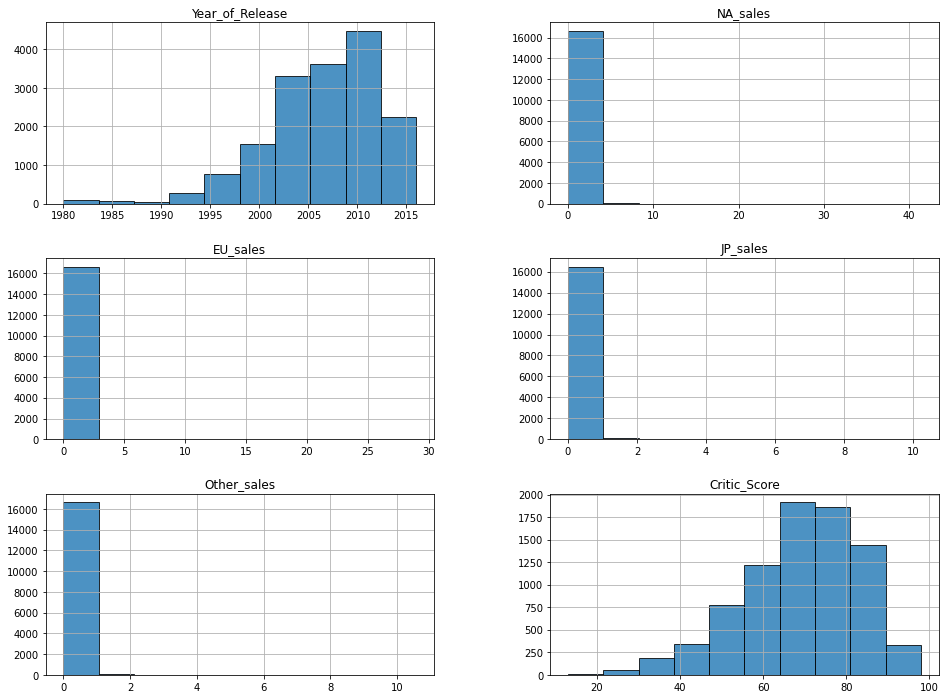

In [7]:
df_0.hist(figsize=(16,12), alpha=0.8, edgecolor = 'black');

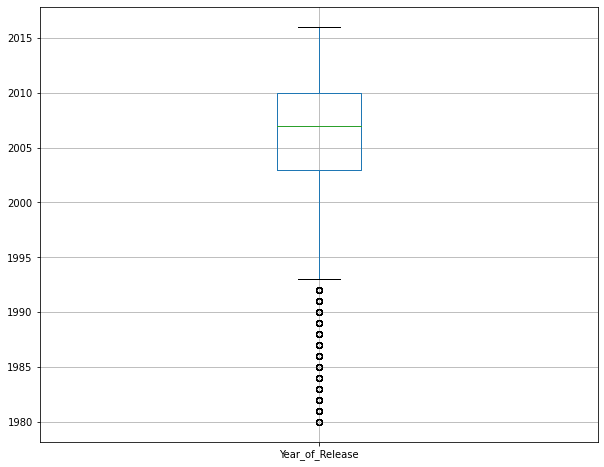

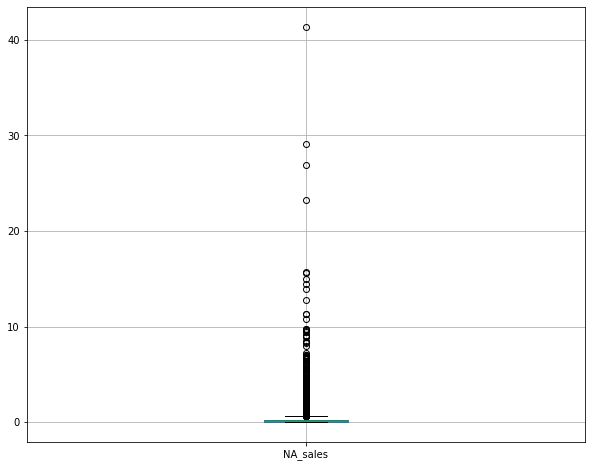

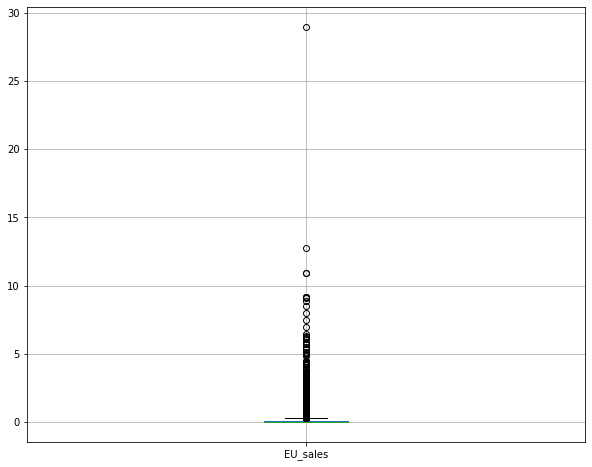

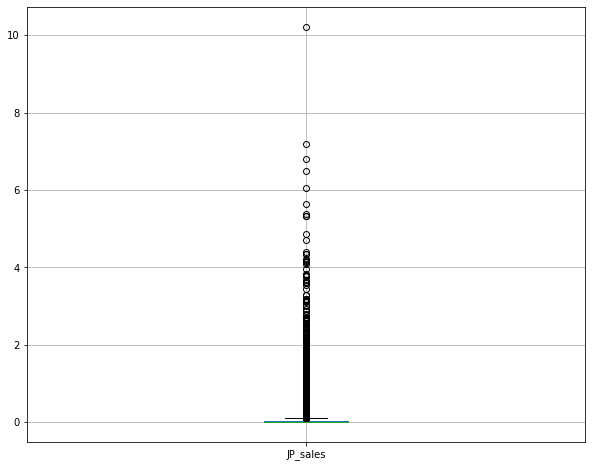

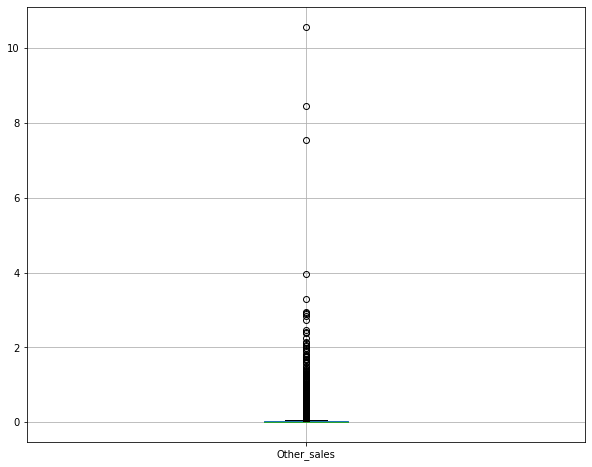

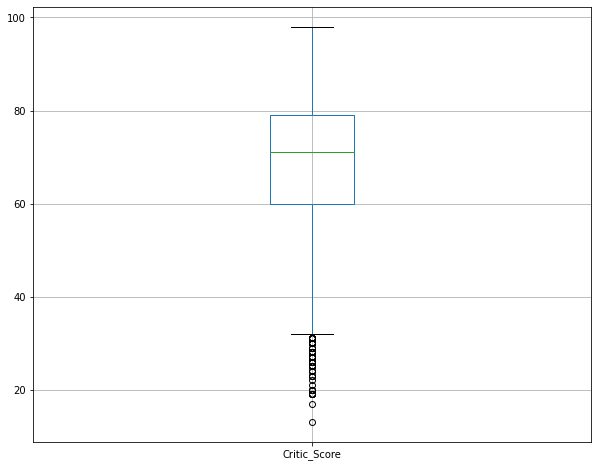

In [8]:
for i in df_0.select_dtypes(include=np.number).columns.tolist():
    plt.figure(figsize=(10,8))
    df_0.boxplot([i])

 **Выводы:**

- названия столбцов необходимо привести к стандартному виду, то есть к нижнему регистру;
- тип данных в столбце Year_of_Release,так как в нем указан только год, нужно заменить с float64 на int32;
- тип данных в столбце User_Score - object связан с тем, что в столбце есть количественные оценки (float) и оценка 'tbd'(str=object), нужно выяснить что такое 'tbd' и привести столбец к одному типу данных;
- всего 11 столбцов, 16715 строк;
- пропуски есть в 6 из 11 столбцов, соответственно 5 столбцов запоненны полностью;
- полных дубликатов в датасете методом duplicated() не выявлено;
- в столбце Name из 16713 строк уникальных только 11559 нужно проверить на скрытые дубликаты;
- в столбцах с информацией о продажах 25 квантиль равен 0 нужно посмотреть почему;
- без предобработки данных общая гистограмма абсолютно неинформативна.

Проработаю все эти моменты на следующем этапе исследования.

## Предобработка данных

<div class="alert alert-info">
<b>Создаю рабочую копию исходного датафрейма df</b>
<br>
</div>

In [9]:
df = df_0.copy(deep=True)

### **Приведем названия столбцов к стандартному виду**

In [10]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Изучим каждый столбец с пропусками и устраним пропущенные значения


#### **Столбец name**

In [11]:
df.loc[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В столбце Name заполнено 16713 строк из 16715. Причина пропуска не известна, год выпуска игр 1993 г. Пропусков меньше 0.1%, игры 1993 г. вряд ли актуальны. Вывод: удалим 2 строки с пропущенными данными.

In [12]:
df = df.dropna(subset=['name']).reset_index(drop=True)

Ранее меня удивило большое количество неуникальных значений в столбце. Посмотрим внимательнее

In [13]:
df['name'].value_counts()

Need for Speed: Most Wanted                               12
LEGO Marvel Super Heroes                                   9
Ratatouille                                                9
Madden NFL 07                                              9
FIFA 14                                                    9
                                                          ..
Blood: The Last Vampire (Joukan)                           1
Pokemon Black 2/Pokemon White 2                            1
Tony Hawk's American Wasteland (Weekly american sales)     1
Taiko no Tatsujin: Appare Sandaime                         1
Super Duper Sumos                                          1
Name: name, Length: 11559, dtype: int64

In [14]:
df.loc[df['name']=='Need for Speed: Most Wanted'].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1189,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1590,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1997,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T


Теперь понятно, у игр с одним названием  могут быть разные платформы и год выпуска. 

Проверю данные на полные дубликаты, исходя из предположения, 
что полный дубликат - это совпадение по первым трем столбцам: Name, Platform, Year_of_Release

In [15]:
df.duplicated(subset=['name', 'platform', 'year_of_release']).sum()

1

In [16]:
duplicateRows = df[df.duplicated(subset=['name', 'platform', 'year_of_release'])]
duplicateRows

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16228,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E


Один возможный дубликат - это не критично. Так как у меня нет полной уверенности, что это именно дубликат, оставлю все как есть.

#### **Столбец genre**

Удаление пропусков в столбце name привело и к удалению пропусков в столбце genre.

#### **Столбец year_of_release**

В столбце year_of_release заполнено 16444 строк из 16713, т.е. 269 пропусков, что соcтавляет 1.6% от общего количества строк. Причина пропусков не известна, восстановить данные нет возможности. Вывод: удалим строки с пропусками.

In [17]:
df = df.dropna(subset=['year_of_release']).reset_index(drop=True)

#### **Столбец critic_score**

В столбце critic_score заполнено 7983 строк из 16444, можно предположить, что оценка критиков по данной игре отсутствует. Сложно сразу решить оставить NaN или заменить пропуски на 0. Думаю, отсутствие оценки - это тоже информация, которую хотелось бы отцифровать, поэтому заменим NaN на 0. Если в разделе 3.5 эта замена будет мешать анализу, вернемся к решению данного вопроса.

In [18]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [19]:
df['critic_score'] = df['critic_score'].fillna(0)

#### **Столбец user_score**

В столбце user_score заполнено 9839 строк из 16444, можно предположить, что оценка пользователей по данной игре отсутствует. Сложно сразу решить оставить NaN или заменить пропуски на 0. Думаю, отсутствие оценки - это тоже информация, которую хотелось бы отцифровать, поэтому заменим NaN на 0. Если в разделе 3.5 эта замена будет мешать анализу, вернемся к решению данного вопроса.

In [20]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [21]:
df['user_score'] = df['user_score'].fillna(0)

Ранее мы обнаружили значение 'tbd' в данном столбце. По данным интернета 'tbd' - to be determined, еще не определен. Так как в целом рейтинг имеет количественную оценку, для удобства дальнейшей работы заменим 'tbd' на 0.

In [22]:
df.loc[df['user_score']=='tbd', 'user_score'] = 0

In [23]:
df['user_score'].value_counts()

0      8981
7.8     322
8       285
8.2     276
8.3     252
       ... 
9.6       2
0.9       2
2.3       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

#### **Столбец rating**

В столбце rating - рейтинг от организации ESRB - заполнено 9768 строк из 16444. ESRB - саморегулируемая организация, которая присваивает потребительским видеоиграм в Соединенных Штатах и Канаде рейтинги по возрасту и содержанию. В других странах другие требования, следовательно, продукция, не произведенная и не продаваемая в США и Канаде, может не иметь данный рейтинг. Просмотр строк с отсутствущим рейтингом показал, что NaN может быть даже у игр, хорошо продающихся в Северной Америке. Следовательно, рейтинг у таких игр есть, но его нет в нашем датасете. Заменю NaN на 'O', это позволит сохранить данные для анализа и будет предупреждать о пропуске в датасете.

Часть рейтингов устарели, рейтинг К-А заменен на Е10+, ЕС - на Е. Заменим устаревшие рейтинги. 

In [24]:
df.loc[df['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0.0,0,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,0.0,0,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,0.0,0,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,0.0,0,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,0.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,0.0,0,NaN
16440,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,0.0,0,NaN
16441,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,0.0,0,NaN
16442,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,0.0,0,NaN


In [25]:
df['rating'] = df['rating'].replace('K-A', 'E10+')
df['rating'] = df['rating'].replace('EC', 'E')

In [26]:
df['rating'] = df['rating'].fillna('O')

In [27]:
df['rating'].value_counts()

O       6676
E       3929
T       2905
M       1536
E10+    1396
RP         1
AO         1
Name: rating, dtype: int64

### **Проведем замену типов данных столбцов**

#### **Столбец year_of_release**

Изменим тип данных с float на int32. Переводить в datetime нет смысла, год как целое число вполне подходит для
целей анализа.

In [28]:
df['year_of_release'] = df['year_of_release'].astype('int32')

#### **Столбец user_score**

Изменим тип данных с object на float32. После замены 'tbd' на 0, мы можем  выполнить данное преобразование.

In [29]:
df['user_score'] = df['user_score'].astype('float32')

Посмотрим, что у нас получилось после удаления\замены пропусков и замены типов данных.

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float32
 10  rating           16444 non-null  object 
dtypes: float32(1), float64(5), int32(1), object(4)
memory usage: 1.3+ MB


Итак, пропусков нет, типы данных соответствуют содержанию столбцов.

### **Создадим итоговый столбец**

In [31]:
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [32]:
df = df[['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'total_sales', 'critic_score', 'user_score', 'rating']]

In [33]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,0.0,0.0,O
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,0.0,0.0,O


### **Изучим аномальные значения в столбцах с продажами**

У меня есть две гипотезы, почему в столбцах с продажами много нулевых значений и даже 25 
квантиль равен 0: 
1) игры продаются в разных регионах, т.е. в одном может быть полное отсутствие продаж, 
зато в другом игра продается. Если мое предположение верно, то в стобце total_sales, 
не должно быть нулей. Проверим.

2) единицы измерения в столбцах sales - млн проданных копий, далеко не все игры имели подобный успех.

In [34]:
df[['na_sales', 'eu_sales','jp_sales', 'other_sales', 'total_sales']].describe().round(2)

,na_sales,eu_sales,jp_sales,other_sales,total_sales
count,16444.00,16444.00,16444.00,16444.00,16444.00
mean,0.26,0.15,0.08,0.05,0.54
std,0.82,0.51,0.31,0.19,1.56
min,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.06
50%,0.08,0.02,0.00,0.01,0.17
75%,0.24,0.11,0.04,0.03,0.47
max,41.36,28.96,10.22,10.57,82.54


Действительно, в столбцах в продажами по регионам много нулей, а в итоговом столбце ситуация другая.

In [35]:
df.loc[df['total_sales']==0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
16405,G1 Jockey 4 2008,PS3,2008,Sports,0.0,0.0,0.0,0.0,0.0,0.0,0.0,O
16438,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,O


Всего 2 строчки с нулевым значением. Удам их.

In [36]:
df = df.loc[df['total_sales']!=0]
df[['na_sales', 'eu_sales','jp_sales', 'other_sales', 'total_sales']].describe().round(2)

,na_sales,eu_sales,jp_sales,other_sales,total_sales
count,16442.00,16442.00,16442.00,16442.00,16442.00
mean,0.26,0.15,0.08,0.05,0.54
std,0.82,0.51,0.31,0.19,1.56
min,0.00,0.00,0.00,0.00,0.01
25%,0.00,0.00,0.00,0.00,0.06
50%,0.08,0.02,0.00,0.01,0.17
75%,0.24,0.11,0.04,0.03,0.47
max,41.36,28.96,10.22,10.57,82.54


Дальше углубляться в эту тему не буду, возможно проблема с нулями решится после того, как мы в следующем разделе определим актуальный период для анализа.

## **Исследовательский анализ данных**

### **Проанализируем показатель "год выпуска" у игр, представленных в датасете**

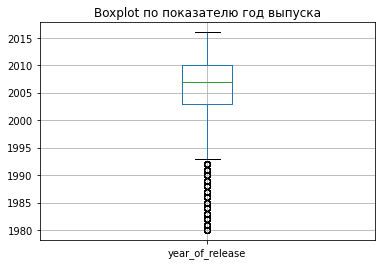

In [37]:
plt.title('Boxplot по показателю год выпуска')
df.boxplot('year_of_release');

Статистика утверждает, что игры, выпущенные до 1994 г. в нашей выборке являются выбросами.

In [38]:
df_years = df.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count').reset_index()
df_years.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
name,9,46,36,17,14,14,21,16,15,17,16,41,43,60,121,219,263,289,379,338,350,482,829,775,762,939,1006,1197,1425,1426,1255,1136,653,544,581,606,502


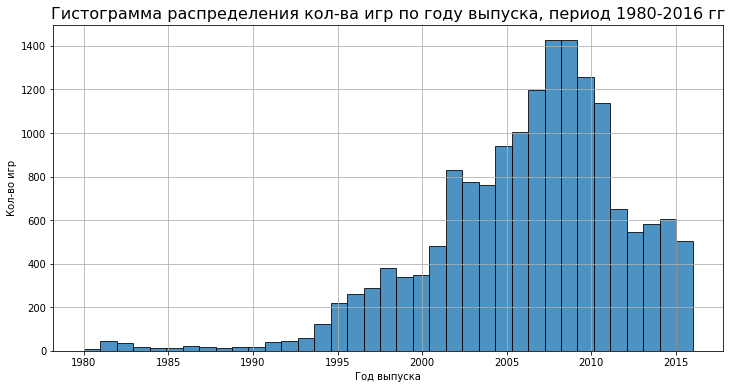

In [39]:
plt.title('Гистограмма распределения кол-ва игр по году выпуска, период 1980-2016 гг', size=16)
plt.xlabel('Год выпуска', size=10)
plt.ylabel('Кол-во игр', size=10)
df['year_of_release'].hist(bins=37, figsize=(12,6),  alpha=0.8, edgecolor = 'black');

In [40]:
#df_years.plot(x='year_of_release', y = 'name', xlabel='Год выпуска', ylabel='Кол-во игр', title='График распределения кол-ва игр по году выпуска, период 1980-2016 гг', figsize=(12, 6), grid=True, style='o-');

**Выводы:**

Действительно, количество игр, выпущенных до 1994 года на рынке крайне мало, в основном представлены игры, выпущенные после 2002 г. Наибольшое количество игр приходится на 2008 - 2009 год выпуска.

Рынок компьютерных игр быстро меняется, идет непрерывный процесс смены технологий, поэтому удалим из нашего датасета игры, выпущенные до 1995 года(округлим дату). Эти игры точно не будут участвовать в нашей рекламной компании, если только мы не надумаем специализироваться на раритетах. 

Актуальный период нужно будет еще раз сократить после изучения периода жизни платформ. 

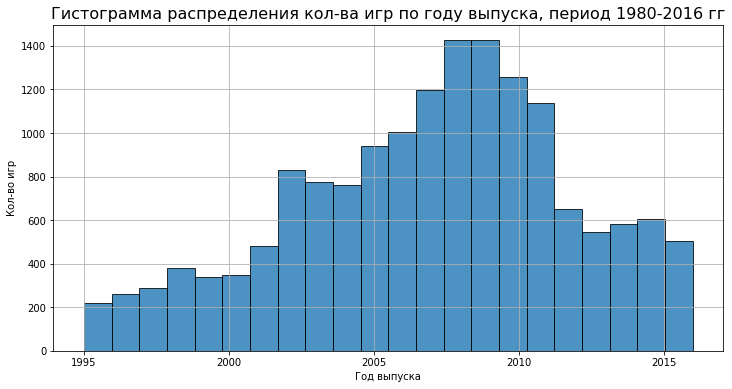

In [41]:
plt.title('Гистограмма распределения кол-ва игр по году выпуска, период 1980-2016 гг', size=16)
plt.xlabel('Год выпуска', size=10)
plt.ylabel('Кол-во игр', size=10)
df1 = df.loc[df['year_of_release']>=1995]
df1['year_of_release'].hist(bins=22, figsize=(12,6),  alpha=0.8, edgecolor = 'black');

In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15956 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             15956 non-null  object 
 1   platform         15956 non-null  object 
 2   year_of_release  15956 non-null  int32  
 3   genre            15956 non-null  object 
 4   na_sales         15956 non-null  float64
 5   eu_sales         15956 non-null  float64
 6   jp_sales         15956 non-null  float64
 7   other_sales      15956 non-null  float64
 8   total_sales      15956 non-null  float64
 9   critic_score     15956 non-null  float64
 10  user_score       15956 non-null  float32
 11  rating           15956 non-null  object 
dtypes: float32(1), float64(6), int32(1), object(4)
memory usage: 1.5+ MB


Размер датасета сократился до 15956 строк, т.е. удалено 488 строк из 16444 - 2.97%.

### **Изучим жизненный цикл платформ, представленных в датасете,  и определим актуальный для нашей рекламной компании период выпуска игр**

In [43]:
df1['platform'].unique()

array(['Wii', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'GBA', 'PS4', '3DS',
       'N64', 'PS', 'XB', 'PC', 'PSP', 'XOne', 'WiiU', 'GC', 'SNES', 'DC',
       'PSV', 'SAT', 'WS', 'NG', 'TG16', '3DO', 'PCFX'], dtype=object)

In [44]:
df1['platform'].nunique()

26

In [45]:
df1_platform = df1.pivot_table(index='year_of_release', columns='platform', values = 'total_sales', aggfunc='sum').fillna(0)
df1_platform

platform,3DO,3DS,DC,DS,GB,GBA,GC,N64,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,,,,,,
1995,0.08,0.00,0.00,0.00,3.60,0.00,0.00,0.00,0.33,4.22,0.00,35.96,0.00,0.00,0.00,0.00,0.00,11.57,32.20,0.16,0.00,0.00,0.00,0.00,0.00,0.00
1996,0.00,0.00,0.00,0.00,36.03,0.00,0.00,34.10,0.10,10.58,0.03,94.70,0.00,0.00,0.00,0.00,0.00,7.69,15.92,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1997,0.00,0.00,0.00,0.00,6.37,0.00,0.00,39.50,0.00,11.27,0.00,136.17,0.00,0.00,0.00,0.00,0.00,6.77,0.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1998,0.00,0.00,3.38,0.00,26.90,0.00,0.00,49.24,0.00,3.26,0.00,169.49,0.00,0.00,0.00,0.00,0.00,3.82,0.22,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1999,0.00,0.00,5.16,0.00,38.00,0.00,0.00,57.87,0.00,4.74,0.00,144.53,0.00,0.00,0.00,0.00,0.00,0.09,0.26,0.00,0.46,0.00,0.00,0.00,0.00,0.00
2000,0.00,0.00,5.99,0.00,19.76,0.07,0.00,33.97,0.00,4.66,0.00,96.37,39.17,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.68,0.00,0.00,0.00,0.99,0.00
2001,0.00,0.00,1.07,0.00,9.24,61.53,26.34,3.25,0.00,5.47,0.00,35.59,166.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.28,0.00,0.00,0.00,22.26,0.00
2002,0.00,0.00,0.29,0.00,0.00,74.16,51.81,0.08,0.00,8.57,0.00,6.67,205.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,48.01,0.00
2003,0.00,0.00,0.00,0.00,0.00,56.67,50.61,0.00,0.00,8.84,0.00,2.07,184.31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,55.04,0.00


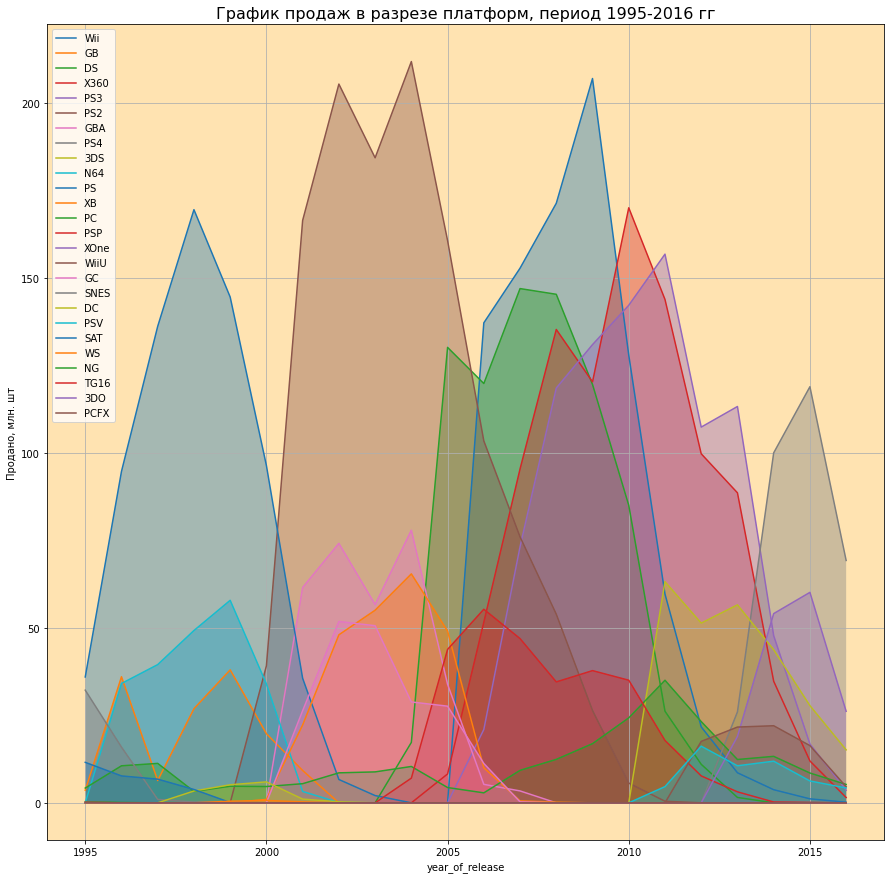

In [46]:
ax = plt.axes()
ax.set_facecolor("orange")
ax.patch.set_alpha(0.3)
for platform in df1['platform'].unique():
    plt.title('График продаж в разрезе платформ, период 1995-2016 гг', size=16)
    plt.xlabel('Год выпуска', size=10)
    plt.ylabel('Продано, млн. шт', size=10)
    df1_platform[platform].plot(figsize=(15,15), grid=True, legend=True);
    plt.fill_between(df1_platform.index, df1_platform[platform], alpha=0.4)

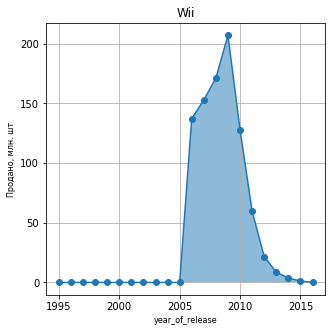

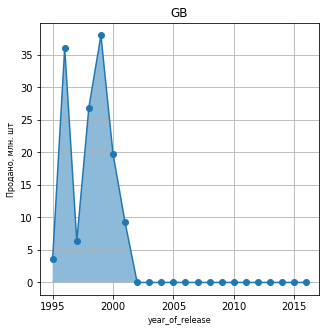

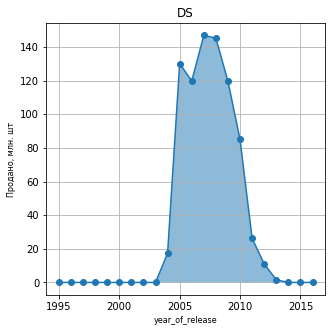

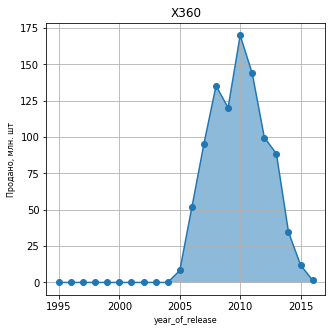

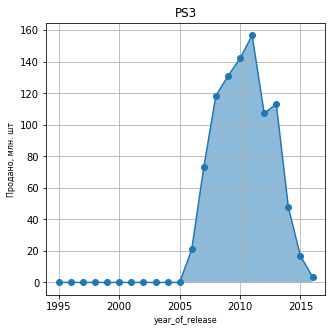

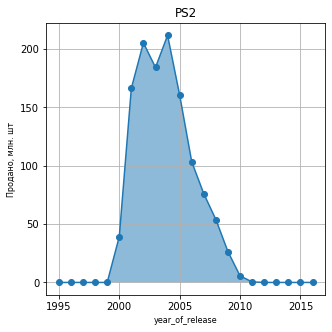

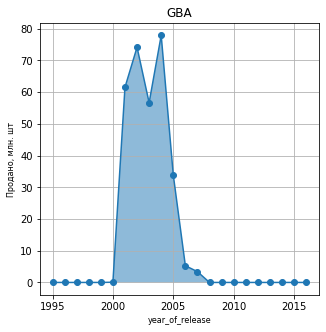

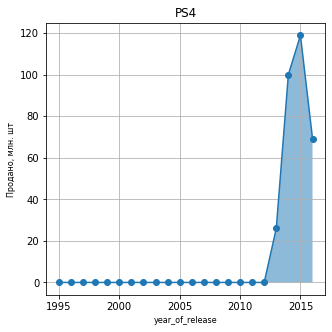

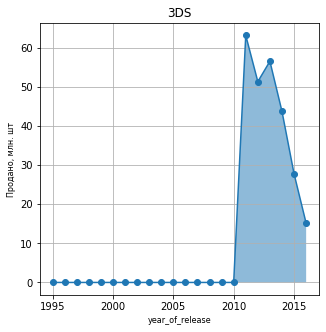

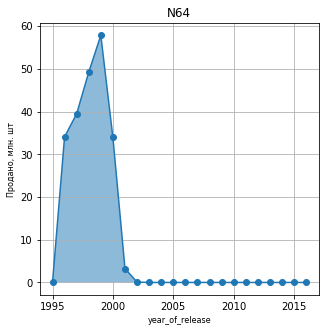

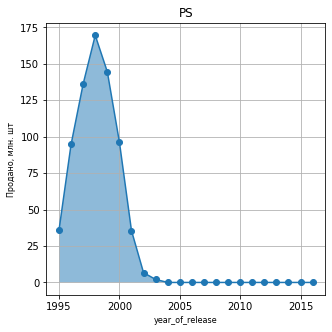

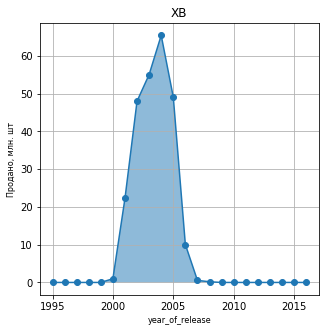

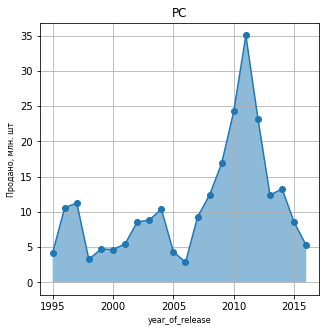

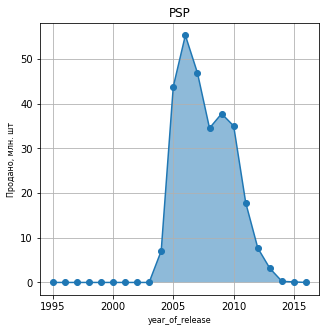

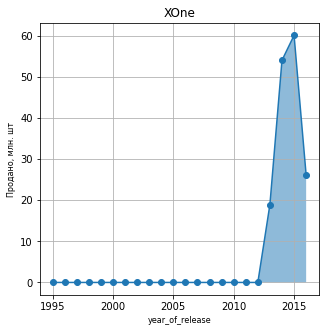

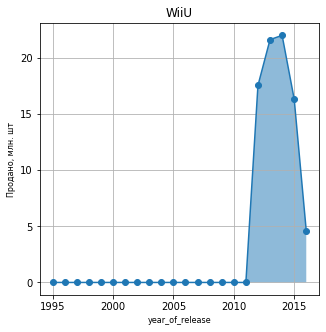

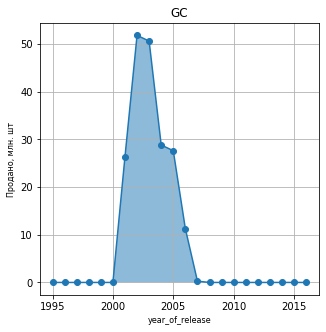

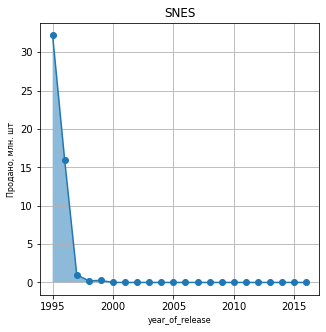

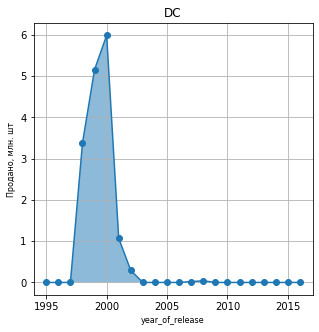

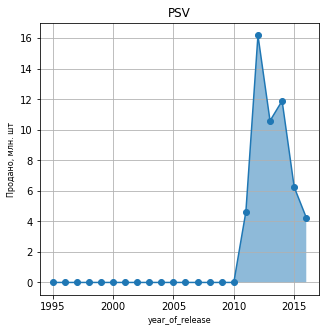

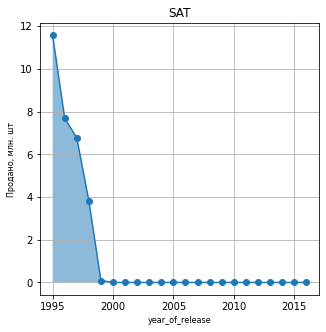

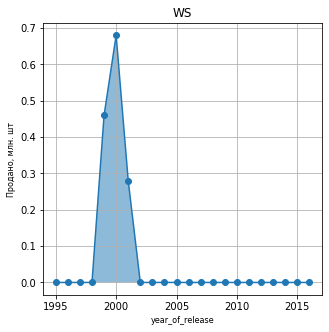

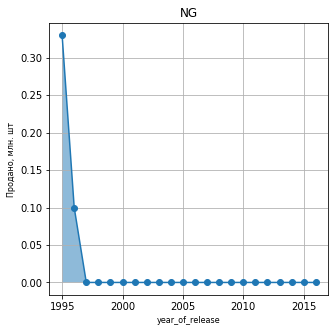

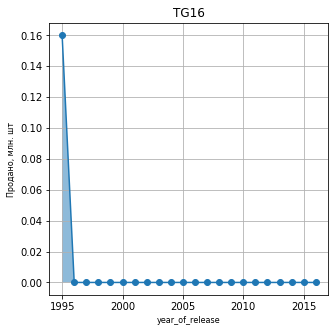

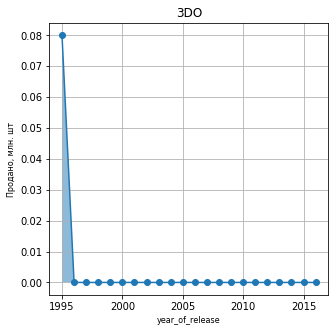

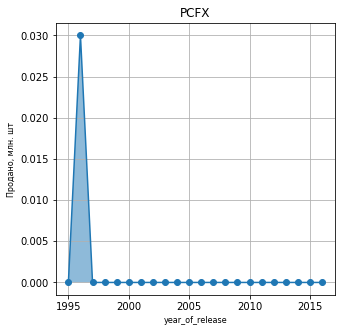

In [47]:
for platform in df1['platform'].unique():
    fig = plt.figure(platform)
    plt.title(platform, size=12)
    plt.xlabel('Год выпуска', size=8)
    plt.ylabel('Продано, млн. шт', size=8)
    df1_platform[platform].plot(figsize=(5,5), grid=True, style='o-');
    plt.fill_between(df1_platform.index, df1_platform[platform], alpha=0.5)
    plt.show()

**Выводы:**

Одни платформы уходят, другие приходят им на смену. Прогресс движется очень быстро.В 2016 на рынке было представлено уже восьмое поколение игровых систем.

На графиках показанных выше видно, что платформы существут на рынке в среднем от 5 до 12 лет(исключение непотопляемая PC). Многие из представленных в нашем датасете платформ уже более 10 лет отсутствут на рынке.

Восьмое поколение игровых систем берёт своё начало после выхода 27 марта 2011 года портативной консоли Nintendo 3DS. Игровые платформы восьмого поколения заменили консоли Xbox 360, Wii и PlayStation 3. 

Интернет-магазине «Стримчик» - современный магазин, ориентированный на продажу актуальных компьтерных игр, следовательно, **в качестве актуального период выберем 2011-2016 гг.** 

<div class="alert alert-info">
<b>На основании датафрейма df1 создаю датафрейм df2 с данными за 2011-2016 гг</b>
<br>
</div>

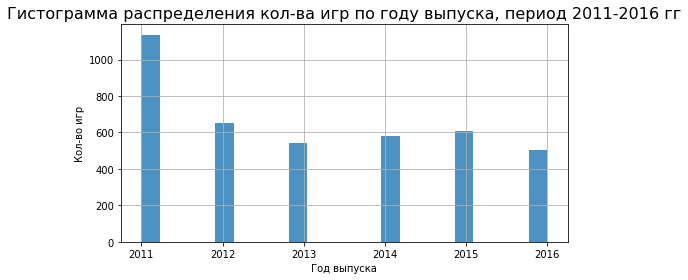

In [48]:
plt.title('Гистограмма распределения кол-ва игр по году выпуска, период 2011-2016 гг', size=16)
plt.xlabel('Год выпуска', size=10)
plt.ylabel('Кол-во игр', size=10)
df2 = df1.loc[df1['year_of_release']>=2011]
df2['year_of_release'].hist(bins=22, figsize=(8,4), alpha=0.8);

In [49]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4022 entries, 16 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             4022 non-null   object 
 1   platform         4022 non-null   object 
 2   year_of_release  4022 non-null   int32  
 3   genre            4022 non-null   object 
 4   na_sales         4022 non-null   float64
 5   eu_sales         4022 non-null   float64
 6   jp_sales         4022 non-null   float64
 7   other_sales      4022 non-null   float64
 8   total_sales      4022 non-null   float64
 9   critic_score     4022 non-null   float64
 10  user_score       4022 non-null   float32
 11  rating           4022 non-null   object 
dtypes: float32(1), float64(6), int32(1), object(4)
memory usage: 377.1+ KB


In [50]:
df2.describe().round(2)

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score
count,4022.00,4022.00,4022.00,4022.00,4022.00,4022.00,4022.00,4022.00
mean,2013.09,0.21,0.17,0.06,0.05,0.49,32.11,3.35
std,1.78,0.57,0.48,0.22,0.16,1.22,36.54,3.49
min,2011.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00
25%,2011.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00
50%,2013.00,0.04,0.03,0.00,0.01,0.13,0.00,2.05
75%,2015.00,0.17,0.13,0.05,0.04,0.41,72.00,7.00
max,2016.00,9.66,9.09,4.39,3.96,21.05,97.00,9.30


In [51]:
df2['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'Wii', 'DS', 'XOne', 'WiiU', 'PC',
       'PSV', 'PSP', 'PS2'], dtype=object)

In [52]:
df2['platform'].nunique()

12

Из 26 платформ осталось 12.

Размер датасета сократился до 4022 строк, т.е. удалено 11934 строки из 15956 - 74.79%. Это очень много, но наша цель - эффективная рекламная компания. 

### **Проанализируем продажи в разрезе платформ, выберем несколько потенциально прибыльных платформ**

In [53]:
top_sales_platform=df2.groupby('platform').agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum', 'other_sales':'sum', 'total_sales':'sum'}).sort_values(by='total_sales', ascending=False)
top_sales_platform.style.highlight_max(axis=0)

,na_sales,eu_sales,jp_sales,other_sales,total_sales
platform,,,,,
PS3,168.260000,163.100000,49.390000,64.820000,445.570000
X360,226.800000,117.100000,3.350000,33.130000,380.380000
PS4,108.740000,141.090000,15.960000,48.350000,314.140000
3DS,82.650000,61.270000,100.620000,13.270000,257.810000
XOne,93.120000,51.590000,0.340000,14.270000,159.320000
PC,29.880000,56.700000,0.000000,11.100000,97.680000
Wii,48.560000,29.600000,8.970000,7.890000,95.020000
WiiU,38.100000,25.130000,13.010000,5.950000,82.190000
PSV,12.470000,13.070000,21.840000,6.430000,53.810000


In [54]:
df2_sales_platform = df2.pivot_table(index='year_of_release', columns='platform', values = 'total_sales', aggfunc='sum').fillna(0)
df2_sales_platform

platform,3DS,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,,
2011,63.20,26.18,35.03,0.45,156.78,0.00,17.82,4.63,59.65,0.00,143.84,0.00
2012,51.36,11.01,23.22,0.00,107.36,0.00,7.69,16.19,21.71,17.56,99.74,0.00
2013,56.57,1.54,12.38,0.00,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,0.00,13.28,0.00,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,0.00,8.52,0.00,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,0.00,5.25,0.00,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


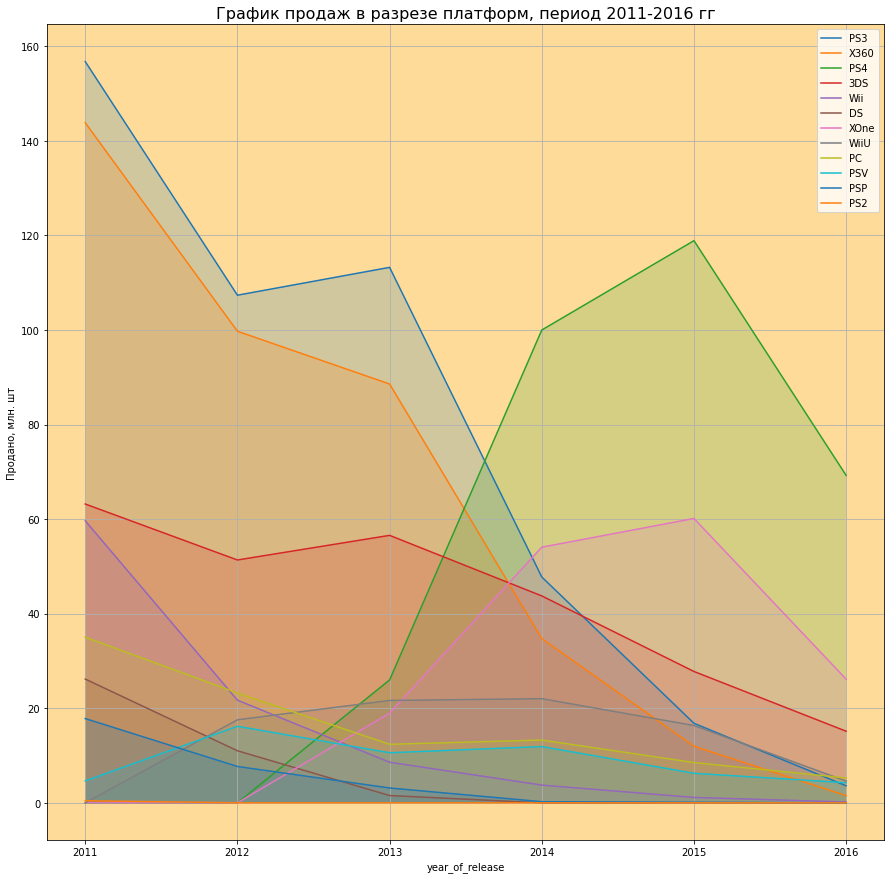

In [55]:
ax = plt.axes()
ax.set_facecolor("orange")
ax.patch.set_alpha(0.4)
for platform in df2['platform'].unique():
    plt.title('График продаж в разрезе платформ, период 2011-2016 гг', size=16)
    plt.xlabel('Год выпуска', size=10)
    plt.ylabel('Продано, млн. шт', size=10)
    df2_sales_platform[platform].plot(figsize=(15,15), grid=True, legend=True);
    plt.fill_between(df2_sales_platform.index, df2_sales_platform[platform], alpha=0.2)

**Выводы:**

- пятерка лидеров по продажам за последние 5 лет: PS3, X360, PS4, 3DS, XOne
- тройка лидеров по продажам за последние 2 года: PS4, XOne, 3DS
- положительную динамику по росту продаж имеют 2 платформы: PS4, XOne
- в Японии есть национальные специфика: лидер продаж - 3DS, XOne -мало продаж.

In [56]:
top_new_names = df2.loc[df2['year_of_release']>=2015, 'platform'].value_counts()
top_new_names

PS4     301
PSV     195
XOne    167
3DS     132
PS3     111
PC      104
X360     48
WiiU     42
Wii       5
PSP       3
Name: platform, dtype: int64

**Вывод:**

За 2015-2016 гг лидерами по выпуску новых игр стали: PS4, PSV, XOne, 3DS

**Вывод:**

**В качестве потенциально прибыльных платформ выберем PS4, XOne, 3DS, PC.** Можно было бы ограничиться двумя первыми платформами, но 3DS, хотя и имеет отрицательную динамику по росту объемов продаж, занимает лидирущие позиции на Японском рынке, поэтому ее выбор позволит увеличить страновой охват аудитории. А уникальная платформа PC, существущая с незапамятных времен появления первых ПК, по мнению многих пользователей лучшая игровая платформа всех времен и народов. 

### **Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам**

<div class="alert alert-info">
<b>На основании датафрейма df2 создаю датафрейм df_last с данными за 2015-2016 гг</b>
<br>
</div>

In [57]:
df_last=df2.loc[df['year_of_release']>=2015]
df_last.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1108 entries, 31 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1108 non-null   object 
 1   platform         1108 non-null   object 
 2   year_of_release  1108 non-null   int32  
 3   genre            1108 non-null   object 
 4   na_sales         1108 non-null   float64
 5   eu_sales         1108 non-null   float64
 6   jp_sales         1108 non-null   float64
 7   other_sales      1108 non-null   float64
 8   total_sales      1108 non-null   float64
 9   critic_score     1108 non-null   float64
 10  user_score       1108 non-null   float32
 11  rating           1108 non-null   object 
dtypes: float32(1), float64(6), int32(1), object(4)
memory usage: 103.9+ KB


In [58]:
df_last.groupby('platform')['total_sales'].describe().round(2).T

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
count,132.00,104.00,111.00,301.00,3.00,195.00,5.00,42.00,48.00,167.00
mean,0.33,0.13,0.18,0.63,0.04,0.05,0.26,0.50,0.28,0.52
std,0.80,0.21,0.34,1.46,0.03,0.06,0.39,0.85,0.38,0.97
min,0.01,0.01,0.01,0.01,0.02,0.01,0.01,0.01,0.01,0.01
25%,0.03,0.02,0.02,0.05,0.02,0.02,0.03,0.05,0.04,0.04
50%,0.09,0.05,0.06,0.12,0.02,0.03,0.15,0.21,0.11,0.13
75%,0.23,0.14,0.16,0.42,0.05,0.06,0.18,0.52,0.35,0.56
max,7.14,1.28,2.70,14.63,0.08,0.41,0.95,4.44,1.70,7.39


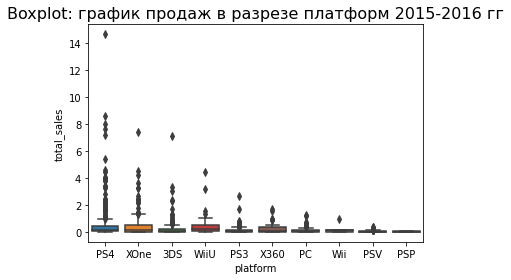

In [59]:
#plt.figure(figsize=(16, 10))
plt.title('Boxplot: график продаж в разрезе платформ 2015-2016 гг', size = 16)
sns.boxplot(x='platform', y='total_sales', data=df_last);
plt.show()

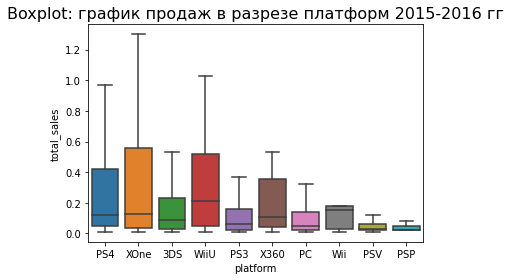

In [60]:
#plt.figure(figsize=(20, 16))
plt.title('Boxplot: график продаж в разрезе платформ 2015-2016 гг', size = 16)
sns.boxplot(x='platform', y='total_sales', data=df_last, showfliers=False);
plt.show()

**Выводы:**

В предыдущем разделе стало понятно, что рынок меняется очень быстро, поэтому для проведения эффективной рекламной компании, нужно сосредоточиться на изучении 2015-2016 гг. 

Boxplot по общей доходности отдельных игр в разрезе платформ говорит, что у выбранной нами тройки платформ-лидеров PS4, XOne, 3DS, (PC) есть отдельные игры, имещие существенно больший размер продаж по сравнению с средненным(медианным) как в целом по рынку, так и по платформе. Наличие таких "хитов" подтверждает правильность выбора нами платформ для проведения рекламной компании. 

### **Изучим влияние отзывов пользователей и критиков на продажи внутри одной из популярных платформ**

Для анализа выберем **платформу PS4**, так как это лидер по числу продаваемых в 2015-2016 гг игр и, как видно из предыдущего раздела, эта платформа имеет игры-хиты с экстримально большими объемами продаж.

In [61]:
df_last_ps4_with_0 = df_last.loc[df_last['platform']=='PS4']
df_last_ps4_with_0.describe().round(2)

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score
count,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00
mean,2015.54,0.21,0.28,0.04,0.10,0.63,44.19,4.33
std,0.50,0.54,0.73,0.07,0.23,1.46,36.41,3.51
min,2015.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00
25%,2015.00,0.00,0.00,0.00,0.00,0.05,0.00,0.00
50%,2016.00,0.03,0.05,0.01,0.02,0.12,63.00,6.10
75%,2016.00,0.16,0.21,0.05,0.06,0.42,76.00,7.60
max,2016.00,6.03,6.12,0.49,2.38,14.63,93.00,9.20


In [62]:
df_last_ps4_without_0 = df_last_ps4_with_0.loc[(df_last_ps4_with_0['critic_score']!=0)&(df_last_ps4_with_0['user_score']!=0)]
df_last_ps4_without_0.describe().round(2)

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score
count,182.00,182.00,182.00,182.00,182.00,182.00,182.00,182.00
mean,2015.53,0.26,0.35,0.04,0.12,0.76,71.95,6.86
std,0.50,0.47,0.78,0.06,0.22,1.39,12.69,1.46
min,2015.00,0.00,0.00,0.00,0.00,0.01,19.00,1.50
25%,2015.00,0.01,0.02,0.00,0.01,0.07,66.00,6.30
50%,2016.00,0.06,0.08,0.00,0.02,0.20,73.00,7.15
75%,2016.00,0.25,0.30,0.05,0.11,0.72,80.00,7.90
max,2016.00,2.53,6.12,0.49,1.28,8.58,93.00,9.20


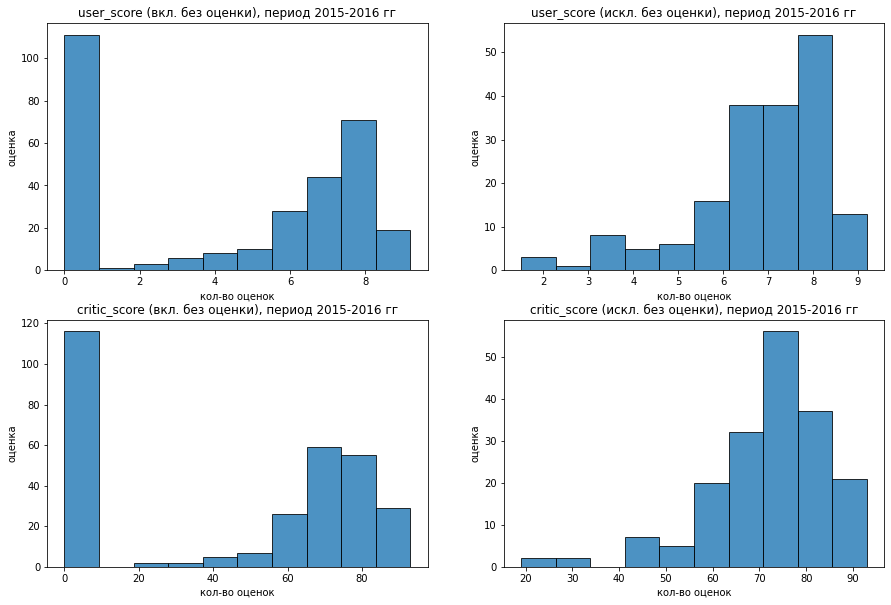

In [63]:
fig, ax = plt.subplots(2, 2, figsize=(15,10))
a = ['user_score', 'critic_score']
for i in [0,1]:
    for j in [0,1]:
        if j==0:
            ax[i, j].set_title(f'{a[i]} (вкл. без оценки), период 2015-2016 гг')
            ax[i, j].hist(df_last_ps4_with_0[a[i]], alpha=0.8, edgecolor = 'black')
        else:
            ax[i, j].set_title(f'{a[i]} (искл. без оценки), период 2015-2016 гг')
            ax[i, j].hist(df_last_ps4_without_0[a[i]], alpha=0.8, edgecolor = 'black')
        ax[i, j].set_xlabel('кол-во оценок')
        ax[i, j].set_ylabel('оценка')
plt.show;

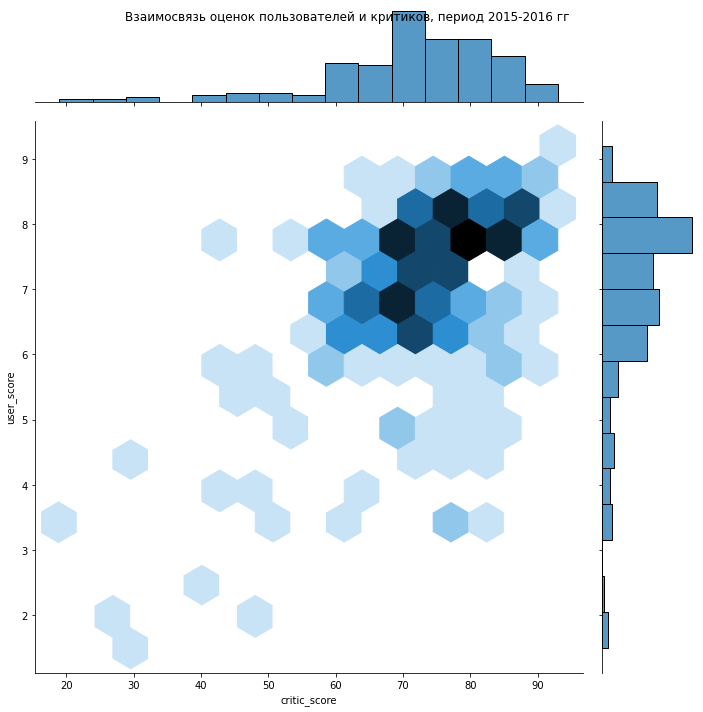

In [64]:
sns.jointplot(x='critic_score', y='user_score', data=df_last_ps4_without_0, kind='hex', height=10).fig.suptitle("Взаимосвязь оценок пользователей и критиков, период 2015-2016 гг");

In [65]:
df_last_ps4_without_0['critic_score'].corr(df_last_ps4_without_0['user_score'])

0.5333298992517176

**Вывод:**

- данные об оценках имеют 182 игры из 301, т.е. 60.4%;
- количество пользователей/критиков, выставивших оценки неизвестно;
- медианная оценка пользователей - 7.15, средняя оценка пользователей - 6.86;
- медианная оценка критиков - 73.00, средняя оценка критиков - 71.95;
- оценки критиков чуть выше оценок пользователей, но в целом между ними видна умеренная положительная корреляция.

Посмотрим как связаны объемы продаж и оценки.

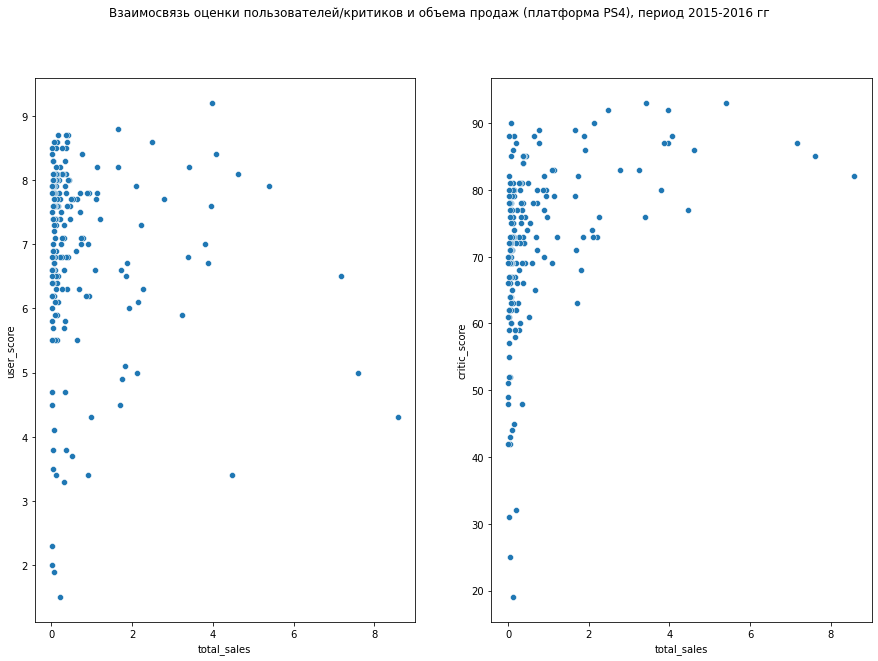

In [66]:
fig, ax = plt.subplots(1, 2, figsize=(15,10))
sns.scatterplot(x='total_sales', y='user_score', data=df_last_ps4_without_0, ax = ax[0])
sns.scatterplot(x='total_sales', y='critic_score', data=df_last_ps4_without_0, ax = ax[1])
fig.suptitle('Взаимосвязь оценки пользователей/критиков и объема продаж (платформа PS4), период 2015-2016 гг')
plt.show();

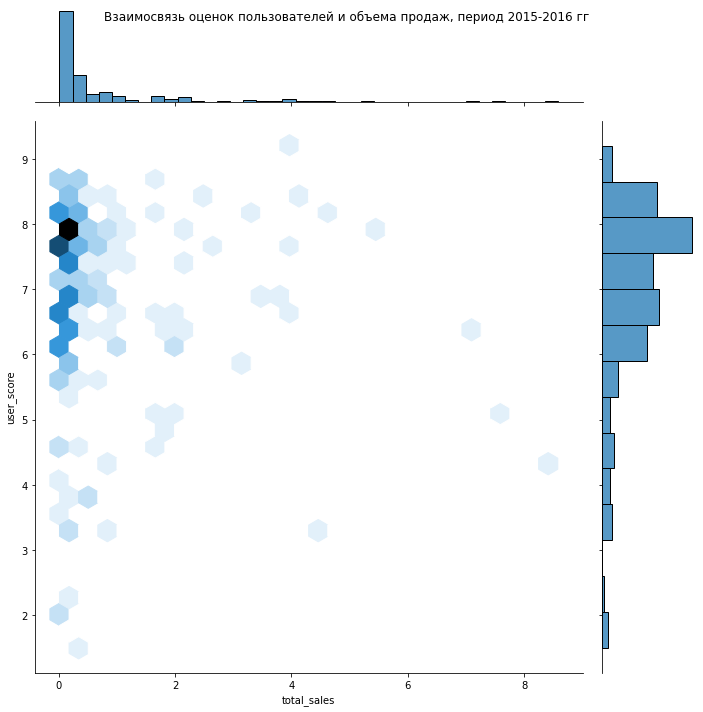

In [67]:
sns.jointplot(x='total_sales', y='user_score', data=df_last_ps4_without_0, kind='hex', height= 10).fig.suptitle("Взаимосвязь оценок пользователей и объема продаж, период 2015-2016 гг");

Расчет к-та корреляции между объемами продаж и оценкой пользователей по платформе ps4

In [68]:
df_last_ps4_without_0['total_sales'].corr(df_last_ps4_without_0['user_score'])

-0.06436843180510407

In [69]:
df_last_ps4_with_0['total_sales'].corr(df_last_ps4_with_0['user_score'])

0.07520105035204858

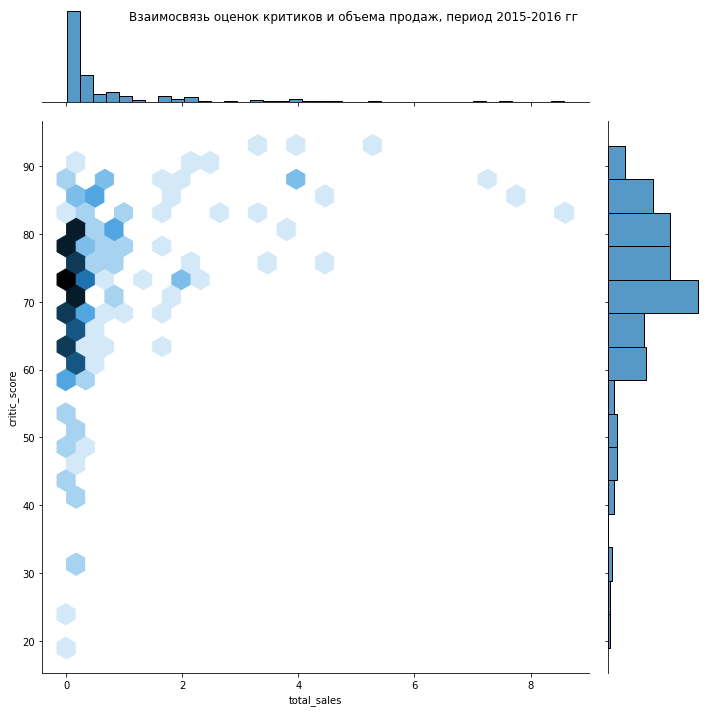

In [70]:
sns.jointplot(x='total_sales', y='critic_score', data=df_last_ps4_without_0, kind='hex', height= 10).fig.suptitle("Взаимосвязь оценок критиков и объема продаж, период 2015-2016 гг");

Расчет к-та корреляции между объемами продаж и оценкой критиков по платформе ps4

In [71]:
df_last_ps4_without_0['total_sales'].corr(df_last_ps4_without_0['critic_score'])

0.3920741369660568

In [72]:
df_last_ps4_with_0['total_sales'].corr(df_last_ps4_with_0['critic_score'])

0.18187930999574856

**Выводы:**

Оценки пользователей и объемы продаж имеют низкую корреляцию -0.06. Неожиданный для меня вывод. Конечно, покупают миллионы копий, а отзывы пишут далеко не все покупатели. Однако, основная причина скорее всего в отсутствии линейной взаимосвязи межеду оценкой пользователей в сети и объемом продаж.

Взаимосвязь между оценкой критиков и объемом продаж сильнее 0.39, но тоже слабая.

Еще раз вспомню о том, что у 40% игр из датасета вообще нет информации об оценке пользователей/критиков, а в имещихся данных неизвестно сколько пользователей/критиков выставили оценки.

Следовательно, коэффециенты корреляции между оценках пользователей/критиков и объемами продаж, полученные на основании анализа ДАННОГО ДАТАСЕТА, не будет учитываться при планировании рекламной компании. А вот наличие отрицательных оценок может насторожить и потребовать поиска дополнительной информации об игре/платформе в целом.

### **Изучим влияние отзывов пользователей/критиков на продажи в других  выбранных платформах**

Проанализируем влияние оценок пользователей и критиков на объемы продаж и в других, выбранных нами для рекламной компании, платформах - 'XOne','3DS' и 'PC'. Используем для этого алгоритм из раздела 3.5.

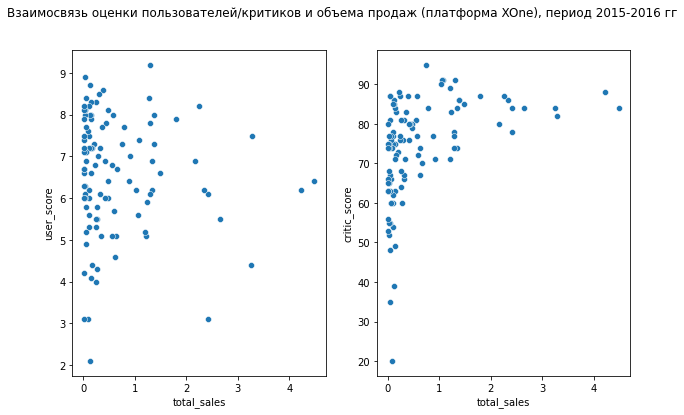

Платформа XOne:
к-т корреляции оценок пользователей и объема продаж равна -0.07, к-т корреляции оценок критиков и объема продаж равна 0.42


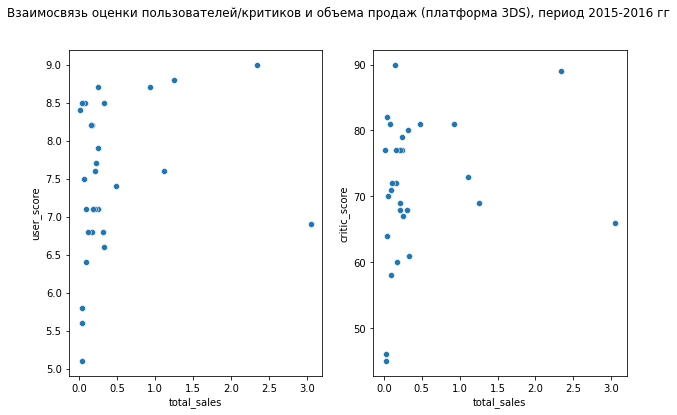

Платформа 3DS:
к-т корреляции оценок пользователей и объема продаж равна 0.24, к-т корреляции оценок критиков и объема продаж равна 0.18


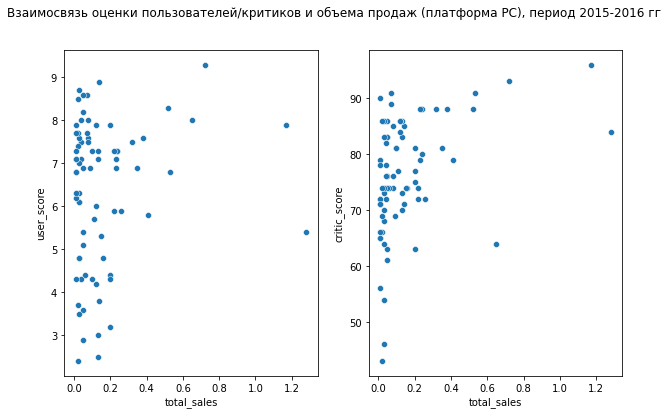

Платформа PC:
к-т корреляции оценок пользователей и объема продаж равна 0.14, к-т корреляции оценок критиков и объема продаж равна 0.38


In [73]:
def score_sales(pl):
    df_def = df_last.loc[df_last['platform']==pl]
    df_def = df_def.loc[(df_def['critic_score']!=0)&(df_def['user_score']!=0)]
    fig, ax = plt.subplots(1, 2, figsize=(10,6))
    sns.scatterplot(x='total_sales', y='user_score', data=df_def, ax = ax[0])
    sns.scatterplot(x='total_sales', y='critic_score', data=df_def, ax = ax[1])
    fig.suptitle(f'Взаимосвязь оценки пользователей/критиков и объема продаж (платформа {pl}), период 2015-2016 гг')
    plt.show();
    corr_user = df_def['total_sales'].corr(df_def['user_score'])
    corr_critic = df_def['total_sales'].corr(df_def['critic_score'])
    return f'Платформа {pl}:\nк-т корреляции оценок пользователей и объема продаж равна {round(corr_user, 2)}, к-т корреляции оценок критиков и объема продаж равна {round(corr_critic, 2)}'

our_platform = ['PS4', 'XOne', '3DS', 'PC']
for i in our_platform[1:]:
    print(score_sales(i))
    

**Выводы:**
    
- корреляция между оценками пользователей и объемами продаж отсутствует: -0.07 платформа XOne, 0.24 платформа 3DS, 0.14 платформа PC;
- корреляция между оценками критиков и объемами продаж слабовыраженная: -0.42 платформа XOne, 0.18 - платформа 3DS, 0.38 - платформа PC.

Вывод, сделанный для платформы PS4, актуален и для платформ XOne, 3DS, PC: коэффециенты корреляции между оценках пользователей/критиков и объемами продаж, полученные на основании анализа ДАННОГО ДАТАСЕТА, не будет учитываться при планировании рекламной компании. А вот наличие отрицательных оценок может насторожить и потребовать поиска дополнительной информации об игре/платформе в целом.

### **Посмотрим на общее распределение игр по жанрам, изучим влияет ли жанр на продажи**

<div class="alert alert-info">
<b>На основании датафрейма df_last создаю датафрейм df_last_region для шага 4 </b>
<br>
</div>

In [74]:
df_last_region = df_last.copy(deep=True)
df_last_region.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1108 entries, 31 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1108 non-null   object 
 1   platform         1108 non-null   object 
 2   year_of_release  1108 non-null   int32  
 3   genre            1108 non-null   object 
 4   na_sales         1108 non-null   float64
 5   eu_sales         1108 non-null   float64
 6   jp_sales         1108 non-null   float64
 7   other_sales      1108 non-null   float64
 8   total_sales      1108 non-null   float64
 9   critic_score     1108 non-null   float64
 10  user_score       1108 non-null   float32
 11  rating           1108 non-null   object 
dtypes: float32(1), float64(6), int32(1), object(4)
memory usage: 136.2+ KB


<div class="alert alert-info">
<b>Сокращаю датафрейм df_last - останутся только выбранные для анализа платформы</b>
<br>
</div>

In [75]:
df_last = df_last.loc[df_last['platform'].isin(our_platform)]
df_last.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 704 entries, 31 to 16406
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             704 non-null    object 
 1   platform         704 non-null    object 
 2   year_of_release  704 non-null    int32  
 3   genre            704 non-null    object 
 4   na_sales         704 non-null    float64
 5   eu_sales         704 non-null    float64
 6   jp_sales         704 non-null    float64
 7   other_sales      704 non-null    float64
 8   total_sales      704 non-null    float64
 9   critic_score     704 non-null    float64
 10  user_score       704 non-null    float32
 11  rating           704 non-null    object 
dtypes: float32(1), float64(6), int32(1), object(4)
memory usage: 66.0+ KB


In [76]:
df_last['genre'].unique()

array(['Shooter', 'Sports', 'Role-Playing', 'Action', 'Simulation',
       'Fighting', 'Racing', 'Adventure', 'Platform', 'Misc', 'Strategy',
       'Puzzle'], dtype=object)

In [77]:
df_last.groupby('platform')['genre'].nunique()

platform
3DS     10
PC      11
PS4     12
XOne    11
Name: genre, dtype: int64

#### **Платформа PS4: распределение кол-ва игр по жанрам**

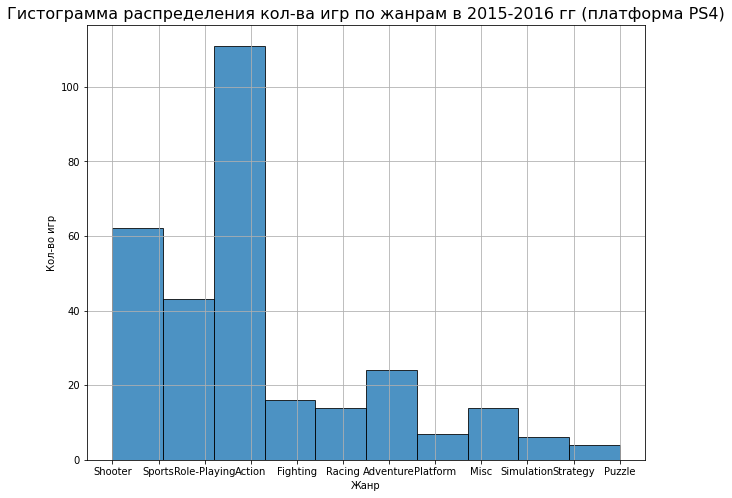

In [78]:
plt.title('Гистограмма распределения кол-ва игр по жанрам в 2015-2016 гг (платформа PS4)', size=16)
plt.xlabel('Жанр', size=10)
plt.ylabel('Кол-во игр', size=10)
df_last.loc[df_last['platform']=='PS4']['genre'].hist(alpha=0.8, edgecolor = 'black', figsize=(10, 8));

In [79]:
df_last_genre = df_last.groupby(['platform', 'genre']).agg({'genre':'count'})
df_last_genre.columns = ['количество']
df_last_genre = df_last_genre.reset_index()
df_last_genre.query('platform=="PS4"').sort_values(by='количество', ascending=False).reset_index(drop=True).head()

,platform,genre,количество
0,PS4,Action,111
1,PS4,Role-Playing,43
2,PS4,Shooter,31
3,PS4,Sports,31
4,PS4,Adventure,24


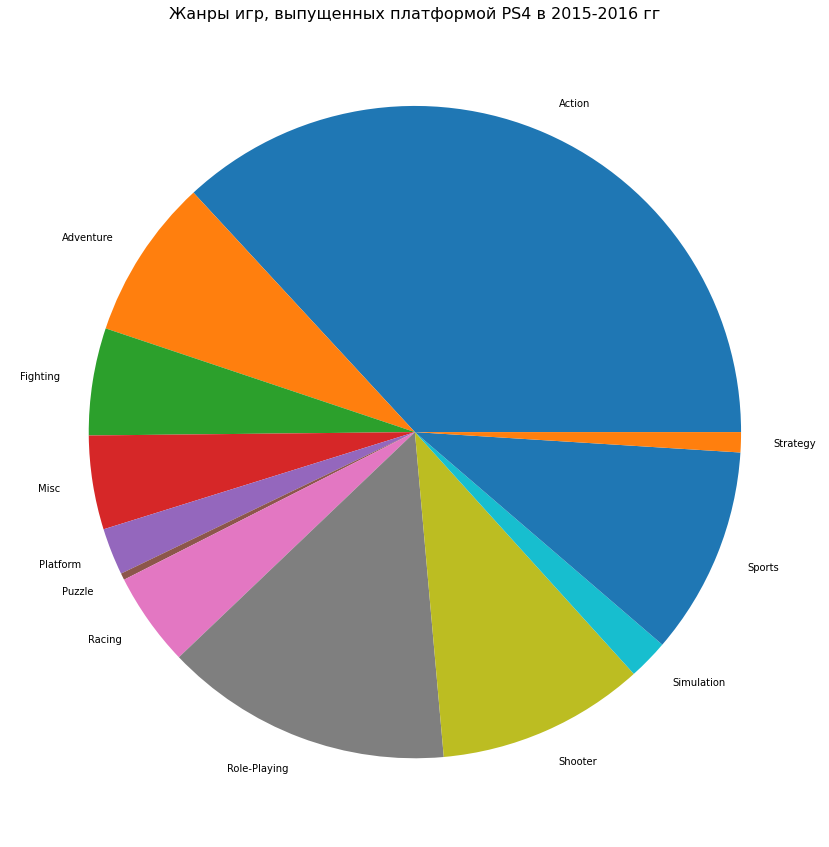

In [80]:
fig = plt.figure(figsize =(15, 15))
plt.title('Жанры игр, выпущенных платформой PS4 в 2015-2016 гг', size=16)
plt.pie(list(df_last_genre.query('platform=="PS4"')['количество']), labels = list(df_last_genre.query('platform=="PS4"')['genre']));

#### **Платформа XOne: распределение кол-ва игр по жанрам**

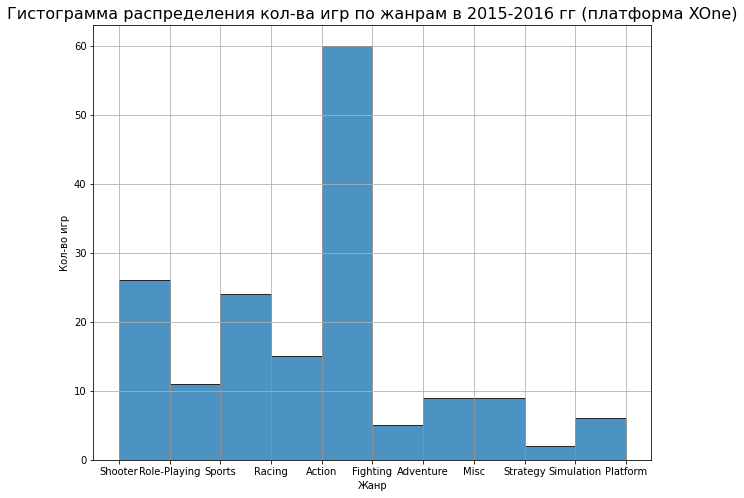

In [81]:
plt.title('Гистограмма распределения кол-ва игр по жанрам в 2015-2016 гг (платформа XOne)', size=16)
plt.xlabel('Жанр', size=10)
plt.ylabel('Кол-во игр', size=10)
df_last.loc[df_last['platform']=='XOne']['genre'].hist(alpha=0.8, edgecolor = 'black', figsize=(10, 8));

In [82]:
df_last_genre.query('platform=="XOne"').sort_values(by='количество', ascending=False).reset_index(drop=True).head()

,platform,genre,количество
0,XOne,Action,60
1,XOne,Shooter,26
2,XOne,Sports,24
3,XOne,Racing,15
4,XOne,Role-Playing,11


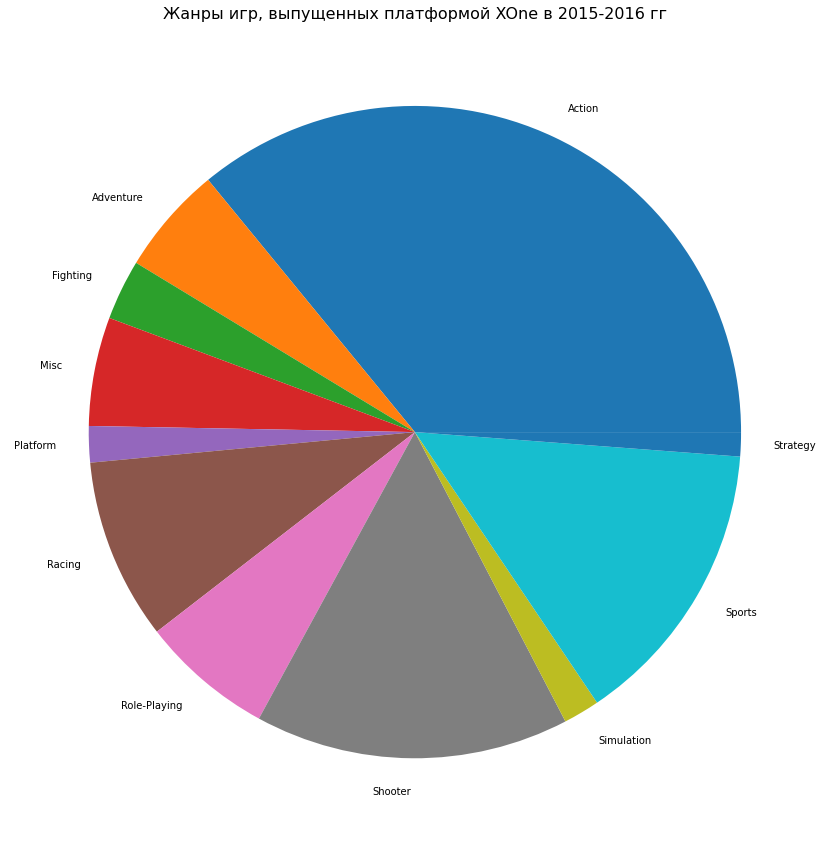

In [83]:
fig = plt.figure(figsize =(15, 15))
plt.title('Жанры игр, выпущенных платформой XOne в 2015-2016 гг', size=16)
plt.pie(list(df_last_genre.query('platform=="XOne"')['количество']), labels = list(df_last_genre.query('platform=="XOne"')['genre']));

#### **Платформа 3DS: распределение кол-ва игр по жанрам**

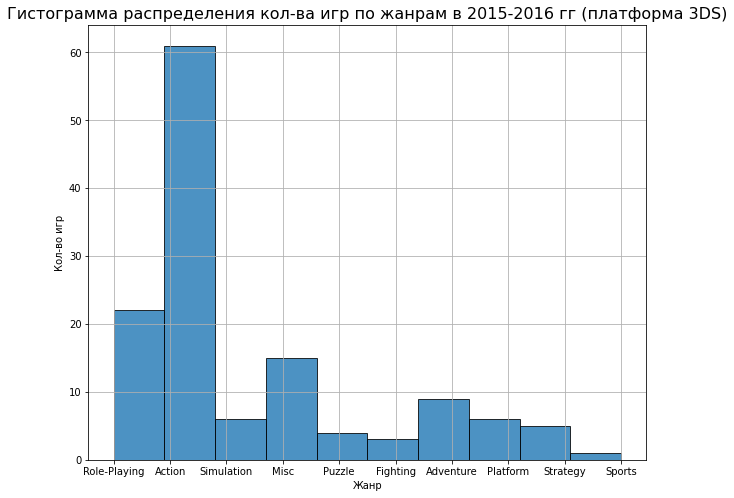

In [84]:
plt.title('Гистограмма распределения кол-ва игр по жанрам в 2015-2016 гг (платформа 3DS)', size=16)
plt.xlabel('Жанр', size=10)
plt.ylabel('Кол-во игр', size=10)
df_last.loc[df_last['platform']=='3DS']['genre'].hist(alpha=0.8, edgecolor = 'black', figsize=(10, 8));

In [85]:
df_last_genre.query('platform=="3DS"').sort_values(by='количество', ascending=False).reset_index(drop=True).head()

,platform,genre,количество
0,3DS,Action,61
1,3DS,Role-Playing,22
2,3DS,Misc,15
3,3DS,Adventure,9
4,3DS,Platform,6


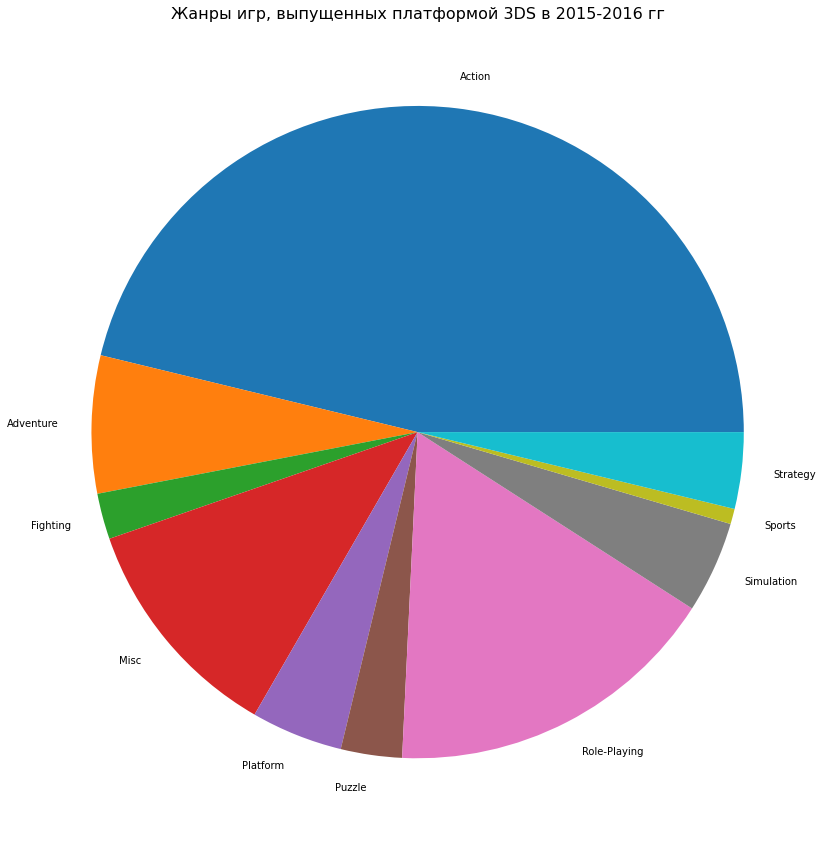

In [86]:
fig = plt.figure(figsize =(15, 15))
plt.title('Жанры игр, выпущенных платформой 3DS в 2015-2016 гг', size=16)
plt.pie(list(df_last_genre.query('platform=="3DS"')['количество']), labels = list(df_last_genre.query('platform=="3DS"')['genre']));

#### **Платформа PC: распределение кол-ва игр по жанрам**

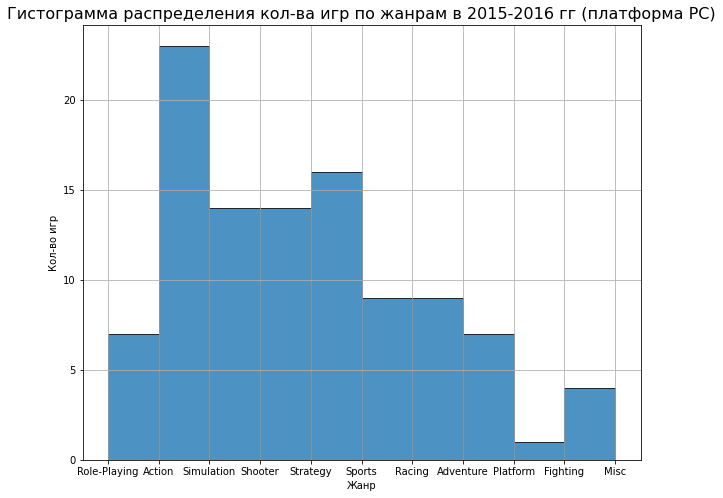

In [87]:
plt.title('Гистограмма распределения кол-ва игр по жанрам в 2015-2016 гг (платформа PC)', size=16)
plt.xlabel('Жанр', size=10)
plt.ylabel('Кол-во игр', size=10)
df_last.loc[df_last['platform']=='PC']['genre'].hist(alpha=0.8, edgecolor = 'black', figsize=(10, 8));

In [88]:
df_last_genre.query('platform=="PC"').sort_values(by='количество', ascending=False).reset_index(drop=True).head()

,platform,genre,количество
0,PC,Action,23
1,PC,Strategy,16
2,PC,Shooter,14
3,PC,Simulation,14
4,PC,Racing,9


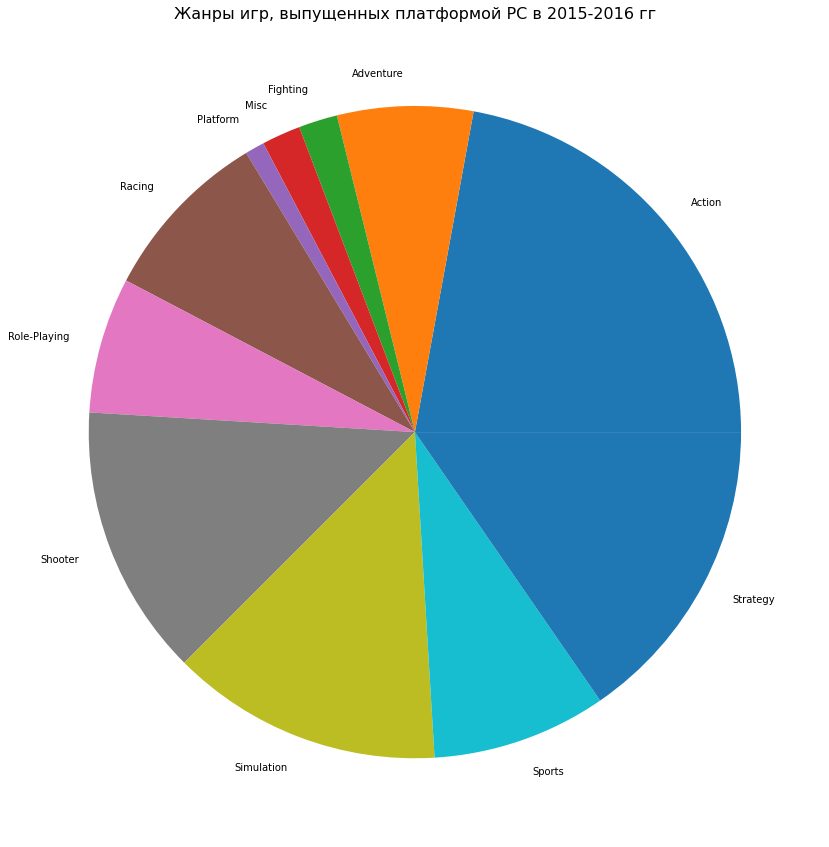

In [89]:
fig = plt.figure(figsize =(15, 15))
plt.title('Жанры игр, выпущенных платформой PC в 2015-2016 гг', size=16)
plt.pie(list(df_last_genre.query('platform=="PC"')['количество']), labels = list(df_last_genre.query('platform=="PC"')['genre']));

#### **Общее распределение кол-ва игр по жанрам по платформам  'PS4', 'XOne', '3DS', 'PC'**

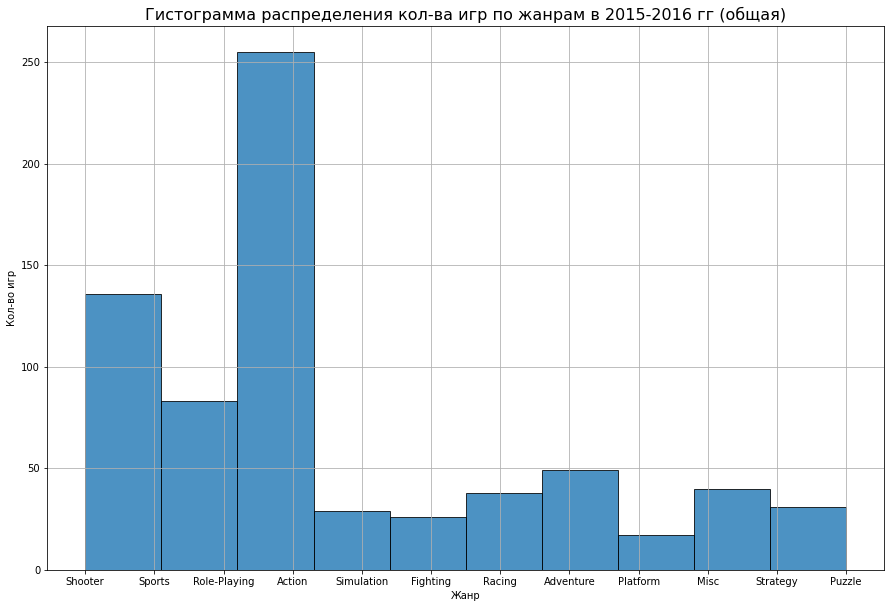

In [90]:
plt.title('Гистограмма распределения кол-ва игр по жанрам в 2015-2016 гг (общая)', size=16)
plt.xlabel('Жанр', size=10)
plt.ylabel('Кол-во игр', size=10)
df_last['genre'].hist(alpha=0.8, edgecolor = 'black', figsize=(15, 10));

In [91]:
df_all_genre = df_last.groupby('genre').agg({'genre':'count'})
df_all_genre.columns = ['количество']
df_all_genre.sort_values(by='количество', ascending=False).head()

,количество
genre,
Action,255
Role-Playing,83
Shooter,71
Sports,65
Adventure,49


**Выводы:**

Мы выявили жанры с максимальным количеством игр, представленных на рынке платформами 'PS4', 'XOne', '3DS', 'PC' в 2015-2016 гг. Безусловный лидер по количеству продащихся на рынке 2015-2016 гг - жанр Action.

Для целей нашей рекламной компании важнее не количество игр, а количество продаж в разрезе жанров, продолжим исследование.

#### **Найдем жанры с высокими и низкими продажами  по платформам  'PS4', 'XOne', '3DS', 'PC'**

In [92]:
df_genre_sales = df_last.pivot_table(index=['platform', 'genre'], values='total_sales', aggfunc=['count', 'sum'])
df_genre_sales.columns = ['count_names', 'total_sales']
df_genre_sales = df_genre_sales.reset_index()
df_genre_sales['sales_per_name'] = round(df_genre_sales['total_sales']/df_genre_sales['count_names'], 4)
df_genre_sales.head()

,platform,genre,count_names,total_sales,sales_per_name
0,3DS,Action,61,18.42,0.3020
1,3DS,Adventure,9,0.69,0.0767
2,3DS,Fighting,3,0.43,0.1433
3,3DS,Misc,15,2.76,0.1840
4,3DS,Platform,6,0.77,0.1283


In [93]:
df_genre_sales.query('platform == "PS4"').sort_values(by='total_sales', ascending=False).reset_index(drop=True).head()

,platform,genre,count_names,total_sales,sales_per_name
0,PS4,Shooter,31,57.16,1.8439
1,PS4,Action,111,48.05,0.4329
2,PS4,Sports,31,34.67,1.1184
3,PS4,Role-Playing,43,23.51,0.5467
4,PS4,Fighting,16,7.57,0.4731


In [94]:
df_genre_sales.query('platform == "XOne"').sort_values(by='total_sales', ascending=False).reset_index(drop=True).head()

,platform,genre,count_names,total_sales,sales_per_name
0,XOne,Shooter,26,35.61,1.3696
1,XOne,Sports,24,15.79,0.6579
2,XOne,Action,60,13.95,0.2325
3,XOne,Role-Playing,11,8.74,0.7945
4,XOne,Racing,15,4.61,0.3073


In [95]:
df_genre_sales.query('platform == "3DS"').sort_values(by='total_sales', ascending=False).reset_index(drop=True).head()

,platform,genre,count_names,total_sales,sales_per_name
0,3DS,Action,61,18.42,0.3020
1,3DS,Role-Playing,22,15.20,0.6909
2,3DS,Simulation,6,3.46,0.5767
3,3DS,Misc,15,2.76,0.1840
4,3DS,Platform,6,0.77,0.1283


In [96]:
df_genre_sales.query('platform == "PC"').sort_values(by='total_sales', ascending=False).reset_index(drop=True).head()

,platform,genre,count_names,total_sales,sales_per_name
0,PC,Shooter,14,3.29,0.2350
1,PC,Action,23,2.81,0.1222
2,PC,Role-Playing,7,2.53,0.3614
3,PC,Strategy,16,1.93,0.1206
4,PC,Simulation,14,1.76,0.1257


In [97]:
df_genre_sales_all = df_genre_sales.groupby('genre').agg({'total_sales':'sum'}).sort_values(by='total_sales', ascending=False)
df_genre_sales_all.columns = ['total_sales']
df_genre_sales_all = df_genre_sales_all.reset_index()
df_genre_sales_all

,genre,total_sales
0,Shooter,96.06
1,Action,83.23
2,Sports,51.18
3,Role-Playing,49.98
4,Racing,10.70
5,Fighting,10.27
6,Adventure,8.41
7,Misc,7.37
8,Simulation,6.78
9,Platform,3.60


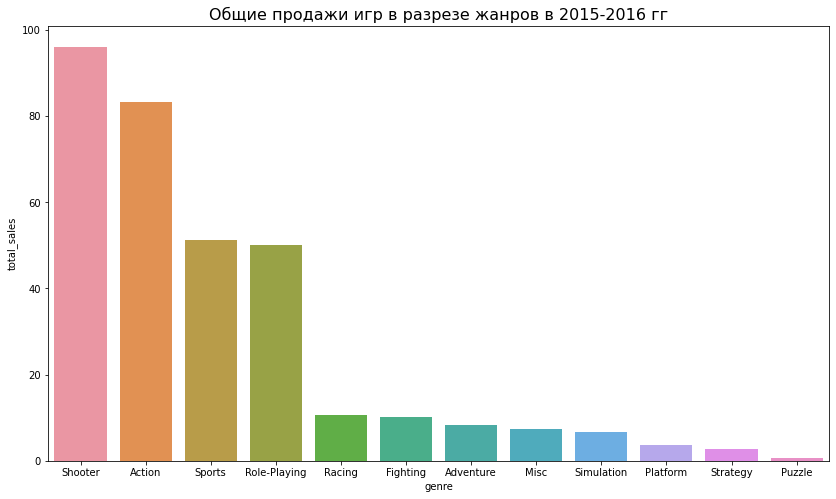

In [98]:
fig = plt.figure(figsize =(14, 8))
plt.title('Общие продажи игр в разрезе жанров в 2015-2016 гг', size=16)
sns.barplot(x='genre', y='total_sales', data=df_genre_sales_all);

In [99]:
df_genre_sales_per_name = df_genre_sales.groupby('genre').agg({'sales_per_name':'max'}).sort_values(by='sales_per_name', ascending=False)
df_genre_sales_per_name.columns = ['sales_per_name']
df_genre_sales_per_name = df_genre_sales_per_name.reset_index()
df_genre_sales_per_name

,genre,sales_per_name
0,Shooter,1.8439
1,Sports,1.1184
2,Role-Playing,0.7945
3,Simulation,0.5767
4,Fighting,0.4731
5,Action,0.4329
6,Racing,0.4114
7,Platform,0.3557
8,Misc,0.2600
9,Adventure,0.2467


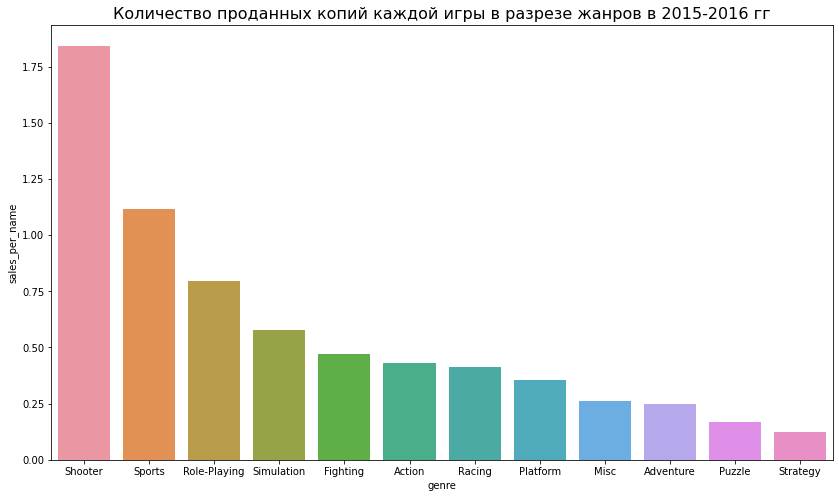

In [100]:
fig = plt.figure(figsize =(14, 8))
plt.title('Количество проданных копий каждой игры в разрезе жанров в 2015-2016 гг', size=16)
sns.barplot(x='genre', y='sales_per_name', data=df_genre_sales_per_name);

#### **Выводы:**

В ходе анализа жанров игр, представленных платформами 'PS4', 'XOne', '3DS' в 2015-2016 гг, мы рассмотрели следущие параметры:

1. количество игр в каждом жанре в разрезе платформ;
2. топ 5 жанров по количеству представленных игр как в разрезе платформ, так и в целом по 4-м платформам;
3. объемы продаж по каждому жанру, как в разрезе платформ, так и в целом по 4-м платформам;
4. определили топ 5 жанров по объемы продаж, как в разрезе платформ, так и в целом по 4-м платформам;
5. ввели показатель количество проданных копий на 1 игру в жанре и расчитали его по каждому жанру в целом по 4-м платформам.

На вопрос "Выделяются ли жанры с высокими и низкими продажами?" ответим положительно. Например, на одну игру в жанре Shooter приходится 1.8439 млн. шт проданных копий, а на одну игру в жанре Strategy	 всего 0.125 млн. шт проданных копий.

Судить о самых прибыльности жанров не получиться, так как нет информации о ценах и себестоимости игр.

Можно выделить самые продаваемые жанры как в разрезе платформ, так и в целом по 4-м платформам:

- платформа PS4 жанры-лидеры по объему продаж: Shooter, Action, Sports;
- платформа XOne жанры-лидеры по объему продаж: Shooter, Sports, Action;
- платформа 3DS жанры-лидеры по объему продаж: Action, Role-Playing, Simulation;
- платформа PC жанры-лидеры по объему продаж: Shooter, Action, Role-Playing;
- по 4 платформам жанры-лидеры по объему продаж: Shooter, Action, Sports;

Если соотнести информацию в разрезе жанров, полученную в целом по рынку компьютерных игр, с данными о продажах нашего интернет магазина, можно будет приступать к рекламной компании. Пока среди жанров три лидера: Shooter, Action, Sports.

## **Портрет пользователя каждого региона**

<div class="alert alert-info">
<b>В этом разделе работаю с датафреймом df_last_region</b>
<br>
</div>

In [101]:
our_regions = ['na_sales', 'eu_sales','jp_sales', 'other_sales']

In [102]:
df_last_region['platform'].nunique()

10

### **Самые популярные платформы (топ-5). Различия в долях продаж**

Регион na: топ-5 самых популярных платформ

          na_sales  proportion
platform                      
PS4          63.86      0.4207
XOne         50.30      0.3314
3DS          10.31      0.0679
WiiU          8.86      0.0584
X360          8.05      0.0530



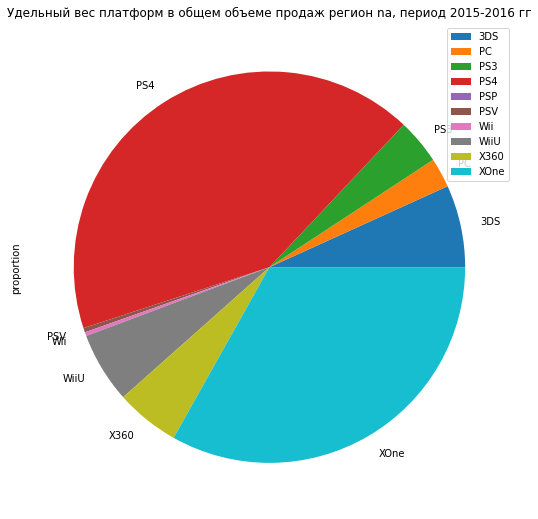

----------------------------------------------------------------------------------------------------

Регион eu: топ-5 самых популярных платформ

          eu_sales  proportion
platform                      
PS4          83.54      0.5647
XOne         28.10      0.1899
PC            9.10      0.0615
3DS           7.39      0.0500
PS3           7.30      0.0493



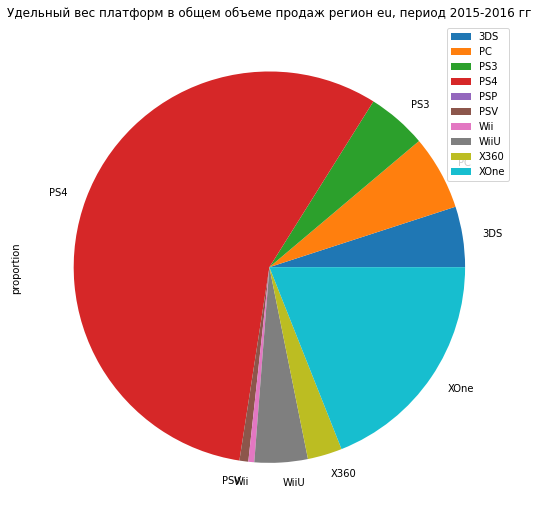

----------------------------------------------------------------------------------------------------

Регион jp: топ-5 самых популярных платформ

          jp_sales  proportion
platform                      
3DS          23.55      0.4410
PS4          12.05      0.2257
PSV           8.41      0.1575
PS3           4.97      0.0931
WiiU          4.12      0.0772



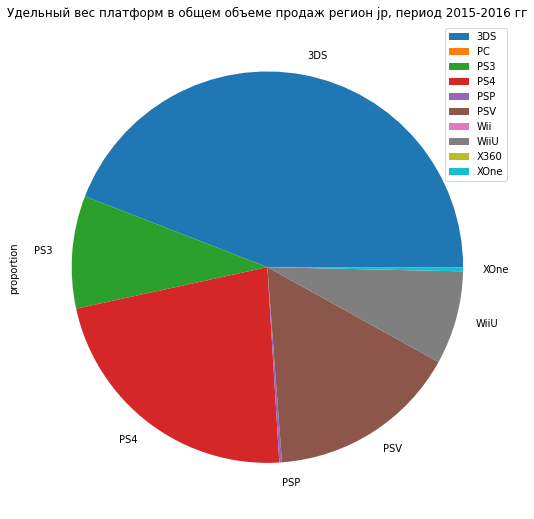

----------------------------------------------------------------------------------------------------

Регион other: топ-5 самых популярных платформ

          other_sales  proportion
platform                         
PS4             28.70      0.6408
XOne             7.71      0.1721
PS3              2.49      0.0556
3DS              1.67      0.0373
WiiU             1.48      0.0330



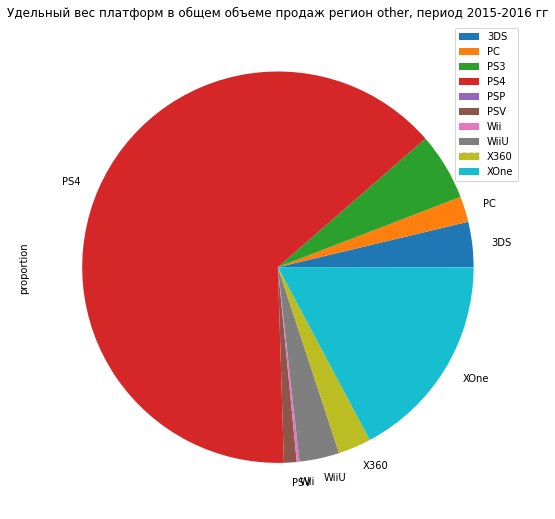

----------------------------------------------------------------------------------------------------



In [103]:
for i in our_regions:
    df_region_platform = df_last_region.groupby('platform').agg({i:'sum'})
    df_region_platform['proportion'] = round(df_region_platform[i]/df_region_platform[i].sum(),4)
    print(f'Регион {i[:-6]}: топ-5 самых популярных платформ')
    print()
    print(df_region_platform.sort_values(by='proportion', ascending=False).head())
    print()
    df_region_platform.plot(y='proportion', kind='pie', figsize=(9,9), title=f'Удельный вес платформ в общем объеме продаж регион {i[:-6]}, период 2015-2016 гг')
    plt.show()
    print('-'*100)
    print()

**Выводы:**

Судя по данным из нашего датасета мир мало чем отличает: в Северной Америке, Европе и прочих регионах наибольший удельный вес в общем объеме продаж занимает платформа PS4 - 42-64%%, на втором месте XOne - 17-22%%, на оставшихся местах топ-5 платформы меняются в зависимости от региона, но удельный вес этих платформ существенно ниже, чем PS4 и XOn.

Особняком держится только Япония: на первом месте платформа 3DS - 44%, на втором месте платформа PS4 - 22%, на третьем месте PSV  - 15%.

Региональные особенности уже были учтены нами при выборе топ-4 платформ для рекламной компании интернет магазина.

### **Самые популярные жанры (топ-5)**

Регион na: топ-5 самых популярных жанров

              na_sales  proportion
genre                             
Shooter          48.18      0.3174
Action           33.68      0.2219
Sports           26.31      0.1733
Role-Playing     19.82      0.1306
Misc              5.58      0.0368



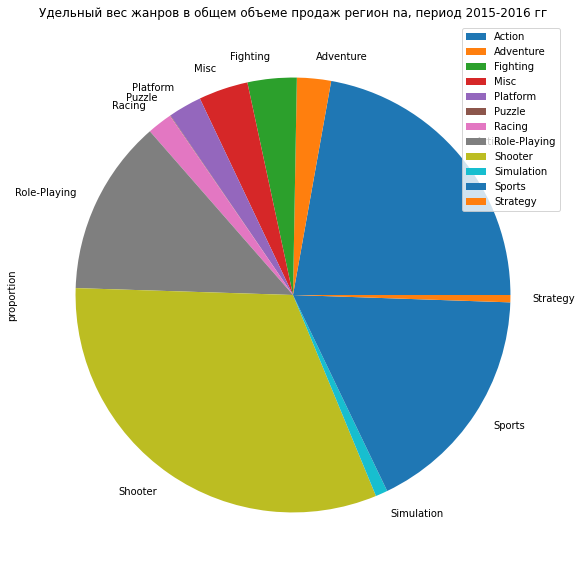

------------------------------------------------------------------------------------------------------------------------

Регион eu: топ-5 самых популярных жанров

              eu_sales  proportion
genre                             
Shooter          40.28      0.2723
Action           34.82      0.2354
Sports           27.82      0.1880
Role-Playing     17.21      0.1163
Racing            6.52      0.0441



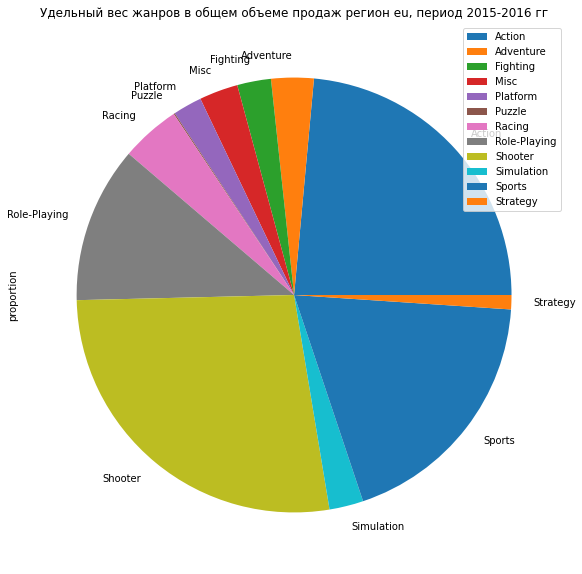

------------------------------------------------------------------------------------------------------------------------

Регион jp: топ-5 самых популярных жанров

              jp_sales  proportion
genre                             
Action           23.05      0.4316
Role-Playing     13.41      0.2511
Shooter           3.79      0.0710
Misc              3.19      0.0597
Adventure         2.22      0.0416



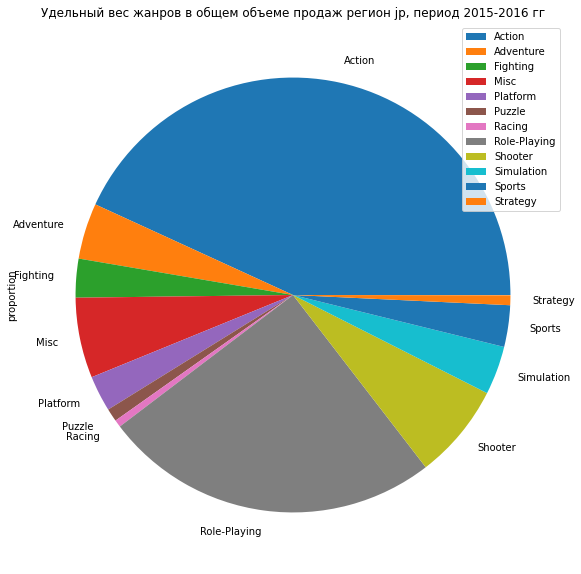

------------------------------------------------------------------------------------------------------------------------

Регион other: топ-5 самых популярных жанров

              other_sales  proportion
genre                                
Shooter             13.48      0.3010
Action              10.58      0.2362
Sports               8.55      0.1909
Role-Playing         5.38      0.1201
Fighting             1.57      0.0351



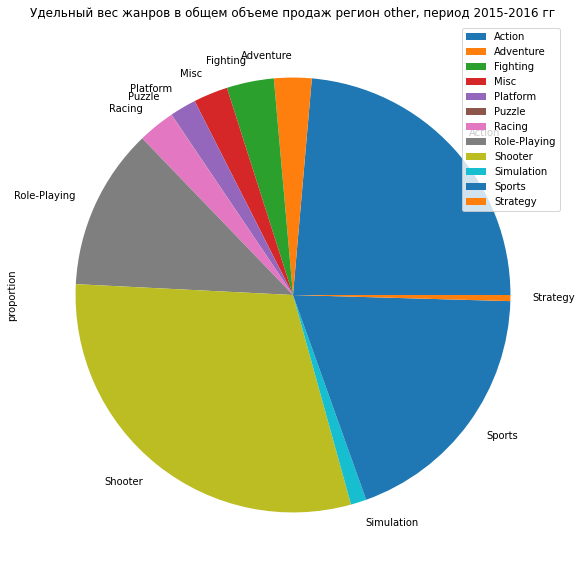

------------------------------------------------------------------------------------------------------------------------



In [104]:
for i in our_regions:
    df_region_genre = df_last_region.groupby('genre').agg({i:'sum'})
    df_region_genre['proportion'] = round(df_region_genre[i]/df_region_genre[i].sum(),4)
    print(f'Регион {i[:-6]}: топ-5 самых популярных жанров')
    print()
    print(df_region_genre.sort_values(by='proportion', ascending=False).head())
    print()
    df_region_genre.plot(y='proportion', kind='pie', figsize=(10,10), title=f'Удельный вес жанров в общем объеме продаж регион {i[:-6]}, период 2015-2016 гг')
    plt.show()
    print('-'*120)
    print()

**Выводы:**

История повторяется предпочтения пользователей Северной Америки, Европы и прочих регионов очень похожи: наибольший удельный вес в общем объеме продаж занимает жанр Shooter - 27-31%%, на втором месте Action - 17-23%%, на третьем месте жанр Sports - 17-19%%, на оставшихся местах топ-5 жанры меняются в зависимости от региона, но удельный вес этих жанров ниже, чем Shooter, Action и Sports.

Япония опять стоит особняком: на первом месте жанр Action - 43%, на втором месте Role-Playing - 25%, на третьем месте Shooter  - 7%.

### **Влияет ли рейтинг ESRB на продажи в отдельном регионе**

Регион na: распределение продаж по рейтингу ESRB

        na_sales  proportion
rating                      
M          47.03      0.3098
O          37.44      0.2467
E          26.59      0.1752
T          22.86      0.1506
E10+       17.87      0.1177



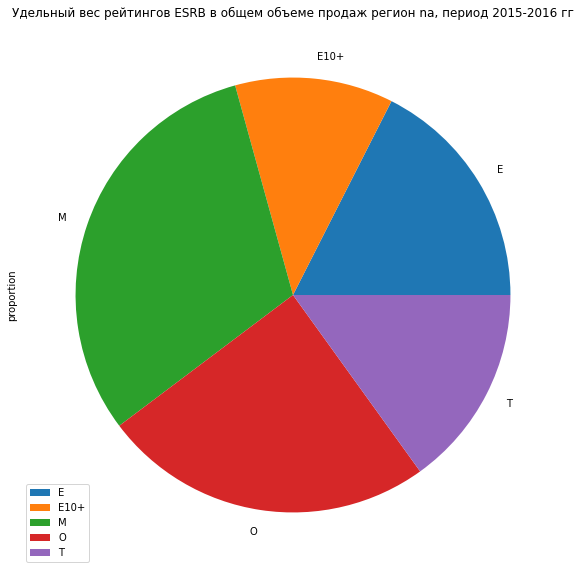

------------------------------------------------------------------------------------------------------------------------

Регион eu: распределение продаж по рейтингу ESRB

        eu_sales  proportion
rating                      
M          45.54      0.3078
O          35.71      0.2414
E          34.83      0.2354
T          20.32      0.1374
E10+       11.54      0.0780



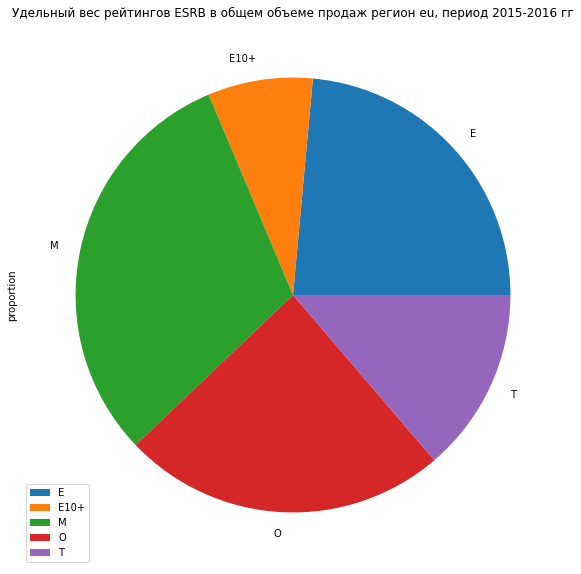

------------------------------------------------------------------------------------------------------------------------

Регион jp: распределение продаж по рейтингу ESRB

        jp_sales  proportion
rating                      
O          32.89      0.6159
T           7.70      0.1442
E           5.25      0.0983
M           4.29      0.0803
E10+        3.27      0.0612



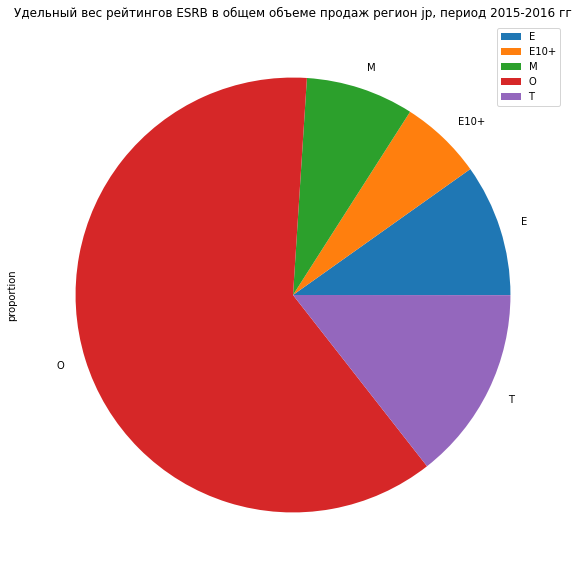

------------------------------------------------------------------------------------------------------------------------

Регион other: распределение продаж по рейтингу ESRB

        other_sales  proportion
rating                         
M             14.24      0.3179
O             11.13      0.2485
E              8.57      0.1913
T              6.85      0.1529
E10+           4.00      0.0893



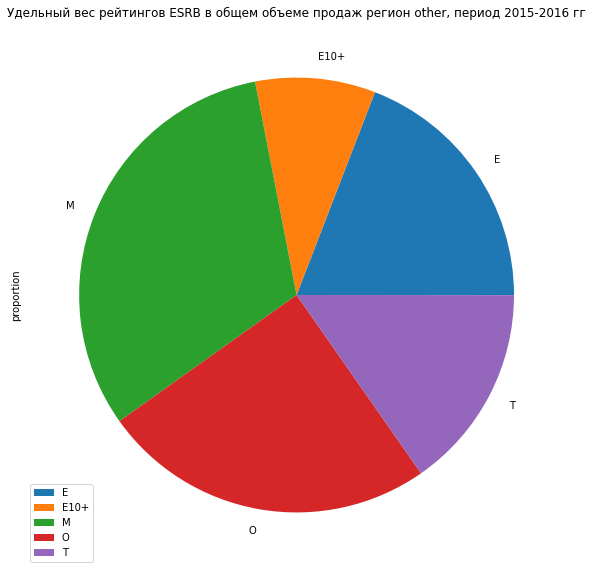

------------------------------------------------------------------------------------------------------------------------



In [105]:
for i in our_regions:
    df_region_esrb = df_last_region.groupby('rating').agg({i:'sum'})
    df_region_esrb['proportion'] = round(df_region_esrb[i]/df_region_esrb[i].sum(),4)
    print(f'Регион {i[:-6]}: распределение продаж по рейтингу ESRB')
    print()
    print(df_region_esrb.sort_values(by='proportion', ascending=False))
    print()
    df_region_esrb.plot(y='proportion', kind='pie', figsize=(10,10), normalize=False, title=f'Удельный вес рейтингов ESRB в общем объеме продаж регион {i[:-6]}, период 2015-2016 гг')
    plt.show()
    print('-'*120)
    print()

**Выводы:**

Опять результаты, полученные  по Северной Америке, Европе и прочим регионам, очень похожи: наибольший удельный вес в общем объеме продаж занимают игры с ретингом М (только для тех, кто старше 17 лет) - 30-32%%, на втором месте игры без рейтинга - 24-25%%, на третьем месте игры с рейтингом Е (в целом подходит для всех возрастов) - 17-24%%, на четвертом месте игры с рейтингом Т (для игроков 13 лет и старше)- 13-15%%, на пятом месте Е10+ (для детей 10 лет и старше) - 7-12%%. Большой удельный вес игр без рейтинга объясняется: 1) рейтинг не имеет юридической силы, 2) рейтинг не распространяется на онлайн игры, 3)рейтинг предназначен для стран Северной Америки, в Европе есть собственный рейтинг PEGI, есть рейтинги и в других странах.

В Японии есть собственный рейтинг CERO, поэтому 62% проданных игр не имеют североамериканского рейтинга.

В рекламной компании офлайн игр, расчитанной на североамериканский рынок следует учитывать факт наличия/отсутствия рейтинга ESRB, на остальных рынках наличие данного рейтинга не обязательно.

## **Проверка гипотез**

<div class="alert alert-info">
<b>В этом разделе работаю с датафреймом df_last</b>
<br>
</div>

### **Гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

**Формулируем двухстороннюю гипотезу**

Н0 - средний пользовательский рейтинг платформ XOne **равен** среднему пользовательскому рейтингу платформы PC 

Н1 - средний пользовательский рейтинг платформ XOne **не равен** среднему пользовательскому рейтингу платформы PC 

Мы имеем дело с гипотезой о равенстве средних двух генеральных совокупностей по взятым из них выборкам, для проверки такой гипотезы используем метод scipy.stats.ttest_ind (array1, array2, equal_var).

**Установим уровень статистической значимости 0.05.**

Основной принцип при выборе alpha - "Не уверены - проверяем строже", в данном случае общепринятые 0.05 кажутся вполне оправданными.


**!!!Немного теории себе на память:**


*При выборе критического уровня значимости необходимо обращать внимание **на объем выборки**. Общая идея тут следующая. При малом объеме выборки более вероятно получить случайный  результат, например, получить различие в двух в выборках при их однородности.  Следовательно, можно взять большую вероятность ошибки первого рода. При увеличении объема выборки случайные отклонения компенсируют друг друга, и получить значимое различие в выборках при их однородности менее вероятно. Следовательно, надо брать меньший уровень значимости. Стандартными уровнями значимости являются 0,1; 0,05; 0,01; 0,001. Поэтому нельзя всегда брать уровень значимость 0,05. Можно придерживаться следующих условных границ зависимости объема выборки от уровня значимости. Если объем выборки небольшой до 100 единиц, то можно вполне отвергнуть нулевую гипотезу при уровне значимости 0,05 или даже 0,1. При объеме выборки, измеряемой сотнями – от 100 до 1000, следует понизить уровень значимости хотя бы до 0,01. А при больших выборках, измеряемых тысячами наблюдений, уверенно отвергать нулевую гипотезу можно только при значимости меньшей 0,001.*

*Также при выборе уровня значимости необходимо учитывать **мощность критерия при альтернативной гипотезе**. Иногда большая мощность критерия оказывается важнее малого уровня значимости, и его значение выбирают относительно большим, например 0,1 или даже 0,2. Такой выбор оправдан, если последствия ошибок второго рода более существенны, чем последствия ошибок первого рода.*

*Кроме того, следует различать понятие статистической значимости и **практической значимости**. Заключение о практической значимости всегда делается исследователем, проверяющим гипотезу. И здесь истинными критерием является экспертное мнение исследователя, его опыт и интуиция, умение «чувствовать» истинный уровень значимости, а не применение стандартного значения 0,05. Окончательный выбор уровня значимости связан с риском, который наступает с выбором решения принимать или отвергать проверяемую гипотезу.*

**Подготовим выборки:**
- оценки пользователей по играм платформы PC за 2015-2016 гг;
- оценки пользователей по играм платформы XOne за 2015-2016 гг;

In [106]:
df_ttest = df_last[df_last['user_score']!=0]
pc_mean_userscore = df_ttest[df_ttest['platform']=='PC']['user_score']
pc_mean_userscore.describe()

count    84.000000
mean      6.296429
std       1.763789
min       1.400000
25%       5.025000
50%       6.900000
75%       7.600000
max       9.300000
Name: user_score, dtype: float64

In [107]:
xone_mean_userscore = df_ttest[df_ttest['platform']=='XOne']['user_score']
xone_mean_userscore.describe()

count    121.000000
mean       6.542149
std        1.458010
min        1.600000
25%        5.800000
50%        6.700000
75%        7.700000
max        9.200000
Name: user_score, dtype: float64

Вопрос: равны ли дисперсии двух выборок? Не знаю, но по по размеру выборки не равны. **Возьмем equal_var равное False...**

In [108]:
alpha = 0.05
results = st.ttest_ind(xone_mean_userscore, pc_mean_userscore, equal_var=False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.2946304927471696
Не получилось отвергнуть нулевую гипотезу


**Вывод:**

В результате t-теста по данным за 2015-2016 гг не удалось отвергнуть нулевую гипотезу о том, что средний пользовательский рейтинг платформ XOne равен среднему пользовательскому рейтингу платформы PC. 

Интересно,что метод describe тоже показал близость к равенству средних оценок пользователей по двум платформам...

**Формулируем двухстороннюю гипотезу**

Н0 - средний пользовательский рейтинг жанра Action **равен** среднему пользовательскому рейтингу жанра Sports 

Н1 - средний пользовательский рейтинг жанра Action **не равен** среднему пользовательскому рейтингу жанра Sports

Мы имеем дело с гипотезой о равенстве средних двух генеральных совокупностей по взятым из них выборкам, для проверки такой гипотезы используем метод scipy.stats.ttest_ind (array1, array2, equal_var).

**Установим уровень статистической значимости 0.05.**

**Подготовим выборки:**
- оценки пользователей по играм в жанре Action за 2015-2016 гг;
- оценки пользователей по играм в жанре Sports за 2015-2016 гг;

In [109]:
df_ttest = df_last[df_last['user_score']!=0]
action_mean_userscore = df_ttest[df_ttest['genre']=='Action']['user_score']
action_mean_userscore.describe()

count    144.000000
mean       6.800000
std        1.345024
min        2.000000
25%        6.250000
50%        7.100000
75%        7.700000
max        9.000000
Name: user_score, dtype: float64

In [110]:
sports_mean_userscore = df_ttest[df_ttest['genre']=='Sports']['user_score']
sports_mean_userscore.describe()

count    56.000000
mean      5.526786
std       1.696359
min       1.400000
25%       4.375000
50%       5.900000
75%       6.625000
max       8.700000
Name: user_score, dtype: float64

Вопрос: равны ли дисперсии двух выборок? Не знаю, но по по размеру выборки не равны. **Возьмем equal_var равное False...**

In [111]:
alpha2 = 0.05
results2 = st.ttest_ind(action_mean_userscore, sports_mean_userscore, equal_var=False)
print('p-значение:', results2.pvalue)

if results2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.726159355178503e-06
Отвергаем нулевую гипотезу


**Вывод:**

В результате t-теста по данным за 2015-2016 гг была отвергнута нулевая гипотеза о том, что средний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sports. Нулевая гипотеза была отвергнута в пользу альтернативной гипотезы о том, что средний пользовательский рейтинг жанра Action не равен среднему пользовательскому рейтингу жанра Sports(что собственно и было нашей задачей).

Интересно,что метод describe тоже показал, что средние оценок пользователей по двум жанрам не стремяться к равенству...

## **Общий вывод**

**1. На входе был получен csv файл:**

- 11 столбцов и 16715 строк;
- в 6 из 11 столбцов имелись пропуски;
- 6 столбцов с типом данных float64, 5 столбцов с типом данных object;
- практически в каждом столбце с количественными переменными были аномальные значения - выбросы.

**2. Проведена предобработка данных:**

-	стандартизированы названия столбцов (приведены к нижнему регистру);
-	преобразованы данные в нужные типы:
    - в столбце year_of_release тип данных изменен с типа float64 на int32;
    - в столбце user_score тип данных изменен с типа object на float32;
-	обработаны пропуски в 6 столбцах:
    - столбец name - удалены пропуски;
    - столбец genre - удалены пропуски;
    - столбец year_of_release - удалены пропуски;
    - столбец critic_score - пропуски заменены на 0;
    - столбец user_score - пропуски заменены на 0;
    - столбец rating - пропуски заменены на 'O';
-	по каждому столбцу с обработанными пропусками даны пояснения;
-	рассчитаны суммарные продажи во всех регионах и записаны в отдельный столбец total_sales;
-	предворительно изучены аномальные значения (выбросы) в столбцах с продажами.


**3. Проведен исследовательский анализ данных**

-	предварительный анализ показателя "год выпуска" у игр, представленных в датасете, привел к  первому сокращению исследуемого периода, удалены данные с 1980 по 1994 гг.
-	в результате изучения жизненного цикла платформ (5-12 лет, исключение непотопляемая платформа РС), был определен актуальный для рекламной компании период выпуска игр 2011-2016 гг.
-	анализ объемов продаж в разрезе платформ позволил сократить анализируемый период выпуска игр до 2015-2016 гг. и выбрать 4 потенциально прибыльные платформы для проведения рекламной компании: PS4, XOne, 3DS, PC.
-	построенный график - «ящик с усами» по глобальным продажам игр в разбивке по платформам позволил выявить наличие у выбранных для рекламной компании платформ отдельных игр, имещих существенно больший размер продаж по сравнению со средненным(медианным) как в целом по рынку, так и по платформе. Этот факт дополнительно подтвердил правильность выбора платформ для рекламной компании. 
-	 в результате анализа влияния отзывов пользователей и критиков на продажи внутри платформ XOne, 3DS, PC также было установлено отсутствие линейной зависимости между оценками пользователей и объемами продаж и слабая положительная зависимость между оценками критиков и объемами продаж.
-	были изучены общее распределение игр по жанрам и влияние жанров на продажи как в разрезе платформ PS4, XOne, 3DS, PC, так и в целом по ним. В результате анализа  были выявили жанры с максимальным количеством игр, представленных на рынке платформами 'PS4', 'XOne', '3DS', 'PC' в 2015-2016 гг.(безусловный лидер - жанр Action) и жанры-лидеры по объемам продаж внутри платформ: Shooter, Action, Sports.
-	анализ количества проданных копий каждой игры в разрезе жанров в 2015-2016 гг позволил подтвердить факт наличия жанров с высокими и низкими продажами.

**4. Составлен портрет пользователя каждого региона (NA, EU, JP, Other)**

- 	определен топ-5 самых популярных платформ по каждому региону. Изучены различия в долях продаж.
    - в регионах NA, EU, Other лидеры: PS4 и Xone;
    - в JP лидеры: 3DS и PS4.
-   определен топ-5 самых популярных жанров по каждому региону.
    - в регионах NA, EU, Other лидеры: Shooter, Action и Sports;
    - в JP лидеры: Action, Role-Playing и Shooter.
-   выявлено влияние рейтинга ESRB на продажи в отдельных регионах.
    - в регионах NA, EU, Other: 25% продаваемых игр не имеют рейтинга, порядка 30% имеют рейтинг М;
    - в JP: более 61% продаваемых игр не имют рейтинга, 14% имеют рейтинг Т, рейтинг М имеют только 8% от продаваемых игр.

**5. Проверены две гипотезы**

- Н0 - средний пользовательский рейтинг платформ XOne равен среднему пользовательскому рейтингу платформы PC;
- Н0 - средний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sports

Первую гипотезу не получилось отвергнуть, p-значение: 0.2946.

Вторая гипотеза была отвергнута в пользу альтернативной гипотезы, p-значение: 2.7261.

**Заключение:**

Цель исследование - проведение эффективной рекламной компании интернет магазина «Стримчик».

Для выполнения данной цели за актуальный период 2015-2016 гг определены 4 перспективные платформы:

- PS4(PlayStation 4) и XOne(Xbox One) - лидиры по количеству игр и объемам продаж, имеющие в отличие от большинства остальных платформ положительную динамику роста объема продаж;
- 3DS (Nintendo 3DS) - лидер продаж в Японии и возможно в азиатском регионе, информации о котором нет в нашем датасете, поэтому для обеспечения странового охвата платформа выбрана несмотря на отрицательную динамику роста продаж в 2015-2016 гг;
- РС - тоже рекомендована для участия в рекламной компании, так как платформа расчитана на эконом сегмент и имеет большое количество поклонников во всем мире, появившееся за длительный срок ее существования. Думаю, что в 2017 г. продажи платформы будут стабильны.

Каждая платформа представлена играми разных жанров, популярность жанров примерно одинакова во всех регионах, представленных в нашем датасете, лидеры - Shooter, Action, к ним можно добавить Sports для европейского и Role-Playing для азиатского рынка. 

Оценки пользователей и критиков слабо коррелируют с объемами продаж, следовательно, выбрав из указанных выше платформ и жанров игры, с максимальными объемами продаж, мы обеспечим эффективность рекламной компании. 

Основываясь на рейтинге ESRB, можно провести рекламную компанию, ориентированную на определенный возрастной сегмент. 

Предпочтения на рынке Северной Америки, Европы и прочих регионов очень схожи, доли отдельных платформ и жанров в общем объеме продаж отличаются на 1-2%%. Особняком стоит Япония (и возможно азиатский рынок), что следует учитывать при проведении рекламной компании.

Рекламный бюджет всегда ограничен, следовательно, окончательное решение будет зависить от наличия у интернет-магазина инфоповода для проведения рекламной компании - выход на рынок нового продукта выбранных нами платформ, распродажи, праздники и т.д. 

### **Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл;
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.);
- [x]  названия столбцов приведины к нижнему регистру;
- [x]  есть пояснения, какие пропущенные значения обнаружены;
- [x]  обнаруженные пропущенные значения обработаны;
- [x]  даны пояснения, в каких столбцах изменены типы данных и почему
- [x]  создан столбец с суммарными продажами по регионам
- [x]  изучены выбросы в столбцах с данными о продажах
- [x]  проанализирован показатель "год выпуска" у игр, представленных в датасете
- [x]  изучен жизненный цикл платформ, определен актуальный для нашей рекламной компании период выпуска игр
- [x]  проанализированы продажи в разрезе платформ, выбрано несколько потенциально прибыльных платформ
- [x]  построен график «ящик с усами» по глобальным продажам игр в разбивке по платформам
- [x]  изучено влияние отзывов пользователей и критиков на продажи внутри одной из популярных платформ
- [x]  изучено влияние отзывов пользователей/критиков на продажи в других выбранных платформах
- [x]  изучено влияние жанра игры на продажи в разрезе выбранных платформ и в целом по ним
- [x]  найдены жанры с высокими и низкими продажами по платформам 'PS4', 'XOne', '3DS', 'PC'
- [x]  построены портреты пользователей каждого региона
- [x]  проанализированы самые популярные платформы (топ-5) в разрезе регионов
- [x]  проанализированы самые популярные жанры (топ-5) в разрезе регионов
- [x]  изучено влияние рейтинга ESRB на продажи в отдельном регионе
- [x]  проверена гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- [x]  проверена гипотеза: средние пользовательские рейтинги жанров Action и Sports разные.
- [x]  сформулированы итоговые выводы по проекту
- [x]  заполнен чек-лист проекта